In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
base_path = '/content/drive/My Drive/jnu/data'

In [ ]:
!unzip '/content/drive/My Drive/jnu/data/output.zip' -d '/content/drive/My Drive/jnu/data/output/'

Archive:  /content/drive/My Drive/jnu/data/output.zip
   creating: /content/drive/My Drive/jnu/data/output/output/
  inflating: /content/drive/My Drive/jnu/data/output/output/1.tif  
  inflating: /content/drive/My Drive/jnu/data/output/output/10.tif  
  inflating: /content/drive/My Drive/jnu/data/output/output/100.tif  
  inflating: /content/drive/My Drive/jnu/data/output/output/11.tif  
  inflating: /content/drive/My Drive/jnu/data/output/output/12.tif  
  inflating: /content/drive/My Drive/jnu/data/output/output/13.tif  
  inflating: /content/drive/My Drive/jnu/data/output/output/14.tif  
  inflating: /content/drive/My Drive/jnu/data/output/output/15.tif  
  inflating: /content/drive/My Drive/jnu/data/output/output/16.tif  
  inflating: /content/drive/My Drive/jnu/data/output/output/17.tif  
  inflating: /content/drive/My Drive/jnu/data/output/output/18.tif  
  inflating: /content/drive/My Drive/jnu/data/output/output/19.tif  
  inflating: /content/drive/My Drive/jnu/data/output/outp

In [ ]:
import numpy as np
import pandas as pd
import os
import tensorflow as tf
from numpy import ones,zeros
from numpy.random import randint
import matplotlib.pyplot as plt
from sklearn.utils import shuffle
import cv2
from sklearn.model_selection import train_test_split
import keras
from tensorflow.keras.models import Model,load_model
from tensorflow.keras.layers import Input,Dense,Flatten,Dropout,Reshape,Conv2D,MaxPooling2D,UpSampling2D,Conv2DTranspose,Concatenate,LeakyReLU,ReLU,Activation
#from keras.layers.normalization import BatchNormalization
from tensorflow.keras.models import Model,Sequential
from tensorflow.keras.callbacks import ModelCheckpoint,TensorBoard,EarlyStopping,ReduceLROnPlateau
from tensorflow.keras.optimizers import Adadelta, RMSprop,SGD,Adam
from tensorflow.keras import regularizers
from keras import backend as K
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.initializers import RandomNormal
%matplotlib inline

In [ ]:
X_path = base_path+'/input/input/'
y_path = base_path+'/output/output/'

In [ ]:
X_path

'/content/drive/My Drive/jnu/data/input/input/'

In [ ]:
X_li = next(os.walk(X_path))[2]
y_li = next(os.walk(y_path))[2]
#y_li.pop()

In [ ]:
y_li

In [ ]:
a = cv2.imread(X_path+X_li[0])
b = cv2.imread(y_path+y_li[0])

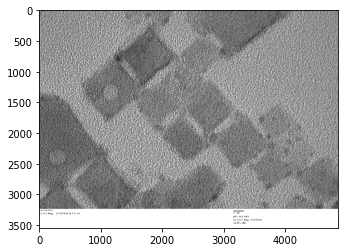

In [ ]:
plt.imshow(b)

In [ ]:
crop_img = b[ : -300, :]

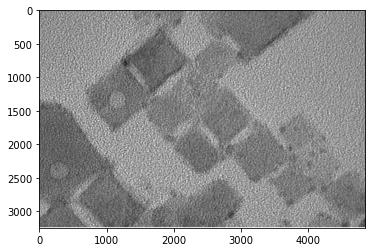

In [ ]:
plt.imshow(crop_img)

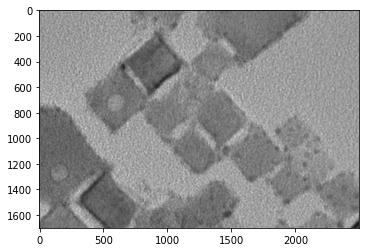

In [ ]:
top = 500
left = 700
bottom  = 2200
right = 3200
new_img = crop_img[top:bottom,left:right]
plt.imshow(new_img)

In [ ]:
y_li[0]

'CsPbBr3_150_10X_001.TIF'

In [ ]:
crop_img.shape

(3244, 4864, 3)

In [ ]:
y_li[0].split('_')

['CsPbBr3', '150', '10X', '001.TIF']

In [ ]:
X_li[0].find('001.TIF')

6

In [ ]:
inp = cv2.resize(X_train[0],(286,286))
out = cv2.resize(y_train[0],(286,286))
a,b = random_jitter(inp, out)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


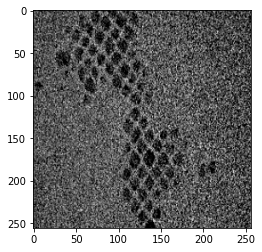

In [ ]:
plt.imshow(a)

In [ ]:
def func(elem):
    return int(elem.split('_')[-1].split('.')[0])

X_li.sort(key = func)
y_li.sort(key = func)

In [ ]:
for i in range(len(X_li)):
  inp = cv2.imread(X_path+X_li[i])
  out = cv2.imread(y_path+y_li[i])
  out = out[:-310,:]
  inp = cv2.resize(inp,(256,256))
  out = cv2.resize(out,(256,256))
  vis = np.concatenate((out,inp), axis=1)
  plt.imsave(base_path+'/final_data/'+str(i)+'.jpg',vis)
  print(i,X_path+X_li[i],y_path+y_li[i])

0 /content/drive/My Drive/jnu/data/input/input/1.TIF /content/drive/My Drive/jnu/data/output/output/1.tif
1 /content/drive/My Drive/jnu/data/input/input/2.tif /content/drive/My Drive/jnu/data/output/output/2.TIF
2 /content/drive/My Drive/jnu/data/input/input/3.tif /content/drive/My Drive/jnu/data/output/output/3.TIF
3 /content/drive/My Drive/jnu/data/input/input/4.tif /content/drive/My Drive/jnu/data/output/output/4.tif
4 /content/drive/My Drive/jnu/data/input/input/5.tif /content/drive/My Drive/jnu/data/output/output/5.tif
5 /content/drive/My Drive/jnu/data/input/input/6.tif /content/drive/My Drive/jnu/data/output/output/6.tif
6 /content/drive/My Drive/jnu/data/input/input/7.tif /content/drive/My Drive/jnu/data/output/output/7.tif
7 /content/drive/My Drive/jnu/data/input/input/8.tif /content/drive/My Drive/jnu/data/output/output/8.tif
8 /content/drive/My Drive/jnu/data/input/input/9.tif /content/drive/My Drive/jnu/data/output/output/9.tif
9 /content/drive/My Drive/jnu/data/input/input

In [ ]:
def random_crop(input_image, real_image):
  stacked_image = tf.stack([input_image, real_image], axis=0)
  cropped_image = tf.image.random_crop(
      stacked_image, size=[2, HEIGHT, WIDTH, 3])

  return cropped_image[0], cropped_image[1]
def random_jitter(input_image, real_image):
  # randomly cropping to 256 x 256 x 3
  input_image, real_image = random_crop(input_image, real_image)

  if tf.random.uniform(()) > 0.5:
    # random mirroring
    input_image = tf.image.flip_left_right(input_image)
    real_image = tf.image.flip_left_right(real_image)

  return input_image, real_image

In [ ]:
def common(path,li,crop_parameter,index):
  img = cv2.imread(path+li[index])
  img = img[:-crop_parameter,:]
  #img = cv2.resize(img,(286,286))
  return img

In [ ]:
HEIGHT, WIDTH = 256,256
def preprocess(X_path,y_path,X_li,y_li,crop_parameter):
  X_,y_ = [],[]
  for i in range(len(X_li)):
    inp = common(X_path,X_li,crop_parameter,i)
    out = common(y_path,y_li,crop_parameter,i)
    top = 500
    left = 700
    bottom  = 2200
    right = 3200
    new_inp = inp[top:bottom,left:right]
    new_inp = cv2.resize(new_inp,(256,256))
    out = cv2.resize(out,(256,256))
    #new_inp,out = random_jitter(new_inp, out)
    new_inp = np.asarray(new_inp)
    out = np.asarray(out)
    X_.append(new_inp)
    y_.append(out)
    print(X_li[i],y_li[i])
  X_ = np.asarray(X_)
  y_ = np.asarray(y_)
  X_,y_ = X_/255.0 ,y_/255.0
  return X_,y_


In [ ]:
X_,y_ = preprocess(X_path,y_path,X_li,y_li,300)

virCs_001.TIF CsPbBr3_150_10X_001.TIF
virCs_002.TIF CsPbBr3_150_10X_002.TIF
virCs_003.TIF CsPbBr3_150_10X_003.TIF
virCs_004.TIF CsPbBr3_150_10X_004.TIF
virCs_005.TIF CsPbBr3_150_10X_005.TIF
virCs_006.TIF CsPbBr3_150_10X_006.TIF
virCs_007.TIF CsPbBr3_150_10X_007.TIF
virCs_008.TIF CsPbBr3_150_10X_008.TIF
virCs_009.TIF CsPbBr3_150_10X_009.TIF
virCs_010.TIF CsPbBr3_150_10X_010.TIF
virCs_011.TIF CsPbBr3_150_10X_011.TIF
virCs_012.TIF CsPbBr3_150_10X_012.TIF
virCs_013.TIF CsPbBr3_150_10X_013.TIF
virCs_014.TIF CsPbBr3_150_10X_014.TIF
virCs_015.TIF CsPbBr3_150_10X_015.TIF
virCs_016.TIF CsPbBr3_150_10X_016.TIF
virCs_017.TIF CsPbBr3_150_10X_017.TIF
virCs_018.TIF CsPbBr3_150_10X_018.TIF
virCs_019.TIF CsPbBr3_150_10X_019.TIF
virCs_020.TIF CsPbBr3_150_10X_020.TIF
virCs_021.TIF CsPbBr3_150_10X_021.TIF
virCs_022.TIF CsPbBr3_150_10X_022.TIF
virCs_023.TIF CsPbBr3_150_10X_023.TIF
virCs_024.TIF CsPbBr3_150_10X_024.TIF
virCs_025.TIF CsPbBr3_150_10X_025.TIF
virCs_026.TIF CsPbBr3_150_10X_026.TIF
virCs_027.TI

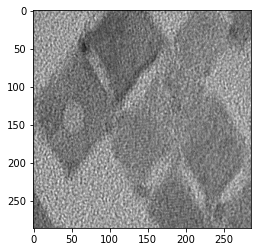

In [ ]:
plt.imshow(X_[1],cmap = 'gray')

In [ ]:
y_.shape

(100, 286, 286, 3)

In [ ]:
X_.shape

(100, 286, 286, 3)

In [ ]:
#X = X.reshape(-1,HEIGHT,WIDTH,1)
#y = y.reshape(-1,HEIGHT,WIDTH,1)
X_,y_ = X_/127.5 - 1,y_/127.5 - 1

**U-net**

In [ ]:
def build_model(input_layer, start_neurons):
    conv1 = Conv2D(start_neurons * 1, (3, 3), activation="relu", padding="same")(input_layer)
    conv1 = Conv2D(start_neurons * 1, (3, 3), activation="relu", padding="same")(conv1)
    pool1 = MaxPooling2D((2, 2))(conv1)
    pool1 = Dropout(0.25)(pool1)

    conv2 = Conv2D(start_neurons * 2, (3, 3), activation="relu", padding="same")(pool1)
    conv2 = Conv2D(start_neurons * 2, (3, 3), activation="relu", padding="same")(conv2)
    pool2 = MaxPooling2D((2, 2))(conv2)
    pool2 = Dropout(0.5)(pool2)

    conv3 = Conv2D(start_neurons * 4, (3, 3), activation="relu", padding="same")(pool2)
    conv3 = Conv2D(start_neurons * 4, (3, 3), activation="relu", padding="same")(conv3)
    pool3 = MaxPooling2D((2, 2))(conv3)
    pool3 = Dropout(0.5)(pool3)

    conv4 = Conv2D(start_neurons * 8, (3, 3), activation="relu", padding="same")(pool3)
    conv4 = Conv2D(start_neurons * 8, (3, 3), activation="relu", padding="same")(conv4)
    pool4 = MaxPooling2D((2, 2))(conv4)
    pool4 = Dropout(0.5)(pool4)

    # Middle
    convm = Conv2D(start_neurons * 16, (3, 3), activation="relu", padding="same")(pool4)
    convm = Conv2D(start_neurons * 16, (3, 3), activation="relu", padding="same")(convm)

    deconv4 = Conv2DTranspose(start_neurons * 8, (3, 3), strides=(2, 2), padding="same")(convm)
    uconv4 = concatenate([deconv4, conv4])
    uconv4 = Dropout(0.5)(uconv4)
    uconv4 = Conv2D(start_neurons * 8, (3, 3), activation="relu", padding="same")(uconv4)
    uconv4 = Conv2D(start_neurons * 8, (3, 3), activation="relu", padding="same")(uconv4)

    deconv3 = Conv2DTranspose(start_neurons * 4, (3, 3), strides=(2, 2), padding="same")(uconv4)
    uconv3 = concatenate([deconv3, conv3])
    uconv3 = Dropout(0.5)(uconv3)
    uconv3 = Conv2D(start_neurons * 4, (3, 3), activation="relu", padding="same")(uconv3)
    uconv3 = Conv2D(start_neurons * 4, (3, 3), activation="relu", padding="same")(uconv3)

    deconv2 = Conv2DTranspose(start_neurons * 2, (3, 3), strides=(2, 2), padding="same")(uconv3)
    uconv2 = concatenate([deconv2, conv2])
    uconv2 = Dropout(0.5)(uconv2)
    uconv2 = Conv2D(start_neurons * 2, (3, 3), activation="relu", padding="same")(uconv2)
    uconv2 = Conv2D(start_neurons * 2, (3, 3), activation="relu", padding="same")(uconv2)

    deconv1 = Conv2DTranspose(start_neurons * 1, (3, 3), strides=(2, 2), padding="same")(uconv2)
    uconv1 = concatenate([deconv1, conv1])
    uconv1 = Dropout(0.5)(uconv1)
    uconv1 = Conv2D(start_neurons * 1, (3, 3), activation="relu", padding="same")(uconv1)
    uconv1 = Conv2D(start_neurons * 1, (3, 3), activation="relu", padding="same")(uconv1)

    output_layer = Conv2D(1, (1,1), padding="same", activation="sigmoid")(uconv1)
    model = Model(inputs=[input_layer], outputs=[output_layer])
    return model

input_layer = Input((HEIGHT, WIDTH, 1))
model = build_model(input_layer, 16)

In [ ]:
model.compile(optimizer=Adam(lr = 0.0001), loss="binary_crossentropy", metrics=["accuracy"])
model.summary()

Model: "functional_9"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_6 (InputLayer)            [(None, 512, 512, 1) 0                                            
__________________________________________________________________________________________________
conv2d_86 (Conv2D)              (None, 512, 512, 16) 160         input_6[0][0]                    
__________________________________________________________________________________________________
conv2d_87 (Conv2D)              (None, 512, 512, 16) 2320        conv2d_86[0][0]                  
__________________________________________________________________________________________________
max_pooling2d_20 (MaxPooling2D) (None, 256, 256, 16) 0           conv2d_87[0][0]                  
_______________________________________________________________________________________

In [ ]:
filepath=base_path+'model/model{epoch:02d}-{val_loss:.2f}.h5'
callbacks = [
    EarlyStopping(patience=50, verbose=1),
    ModelCheckpoint(filepath =filepath, verbose=1, save_best_only=True)
]

In [ ]:
X_train, X_test,y_train,y_test = train_test_split(X,y,test_size=0.1, random_state=42)

NameError: ignored

In [ ]:
results = model.fit(X_train, y_train, batch_size=8, epochs=100, callbacks=callbacks,validation_split=0.1)

Epoch 1/100
11/11 [==============================] - ETA: 0s - loss: 0.6936 - accuracy: 0.0031
Epoch 00001: val_loss improved from inf to 0.69176, saving model to /content/drive/My Drive/jnu/model/model01-0.69.h5
11/11 [==============================] - 5s 466ms/step - loss: 0.6936 - accuracy: 0.0031 - val_loss: 0.6918 - val_accuracy: 0.0040
Epoch 2/100
10/11 [==========================>...] - ETA: 0s - loss: 0.6934 - accuracy: 0.0033
Epoch 00002: val_loss improved from 0.69176 to 0.69176, saving model to /content/drive/My Drive/jnu/model/model02-0.69.h5
11/11 [==============================] - 4s 357ms/step - loss: 0.6934 - accuracy: 0.0033 - val_loss: 0.6918 - val_accuracy: 0.0040
Epoch 3/100
11/11 [==============================] - ETA: 0s - loss: 0.6933 - accuracy: 0.0035
Epoch 00003: val_loss improved from 0.69176 to 0.69170, saving model to /content/drive/My Drive/jnu/model/model03-0.69.h5
11/11 [==============================] - 3s 312ms/step - loss: 0.6933 - accuracy: 0.0035 - 

**GANs Pix2Pix**

In [ ]:
X_li

In [ ]:
image_shape = (HEIGHT,WIDTH,3)

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test,y_train,y_test = train_test_split(X_,y_,test_size=0.1, random_state=42)

In [ ]:
dataset = [X_train,y_train]

In [ ]:
np.shape(dataset)

(2, 90, 256, 256, 3)

In [ ]:
# define the discriminator model
def define_discriminator(image_shape):
	# weight initialization
	init = RandomNormal(stddev=0.02)
	# source image input
	in_src_image = Input(shape=image_shape)
	# target image input
	in_target_image = Input(shape=image_shape)
	# concatenate images channel-wise
	merged = Concatenate()([in_src_image, in_target_image])
	# C64
	d = Conv2D(64, (4,4), strides=(2,2), padding='same', kernel_initializer=init)(merged)
	d = LeakyReLU(alpha=0.2)(d)
	# C128
	d = Conv2D(128, (4,4), strides=(2,2), padding='same', kernel_initializer=init)(d)
	d = BatchNormalization()(d)
	d = LeakyReLU(alpha=0.2)(d)
	# C256
	d = Conv2D(256, (4,4), strides=(2,2), padding='same', kernel_initializer=init)(d)
	d = BatchNormalization()(d)
	d = LeakyReLU(alpha=0.2)(d)
	# C512
	d = Conv2D(512, (4,4), strides=(2,2), padding='same', kernel_initializer=init)(d)
	d = BatchNormalization()(d)
	d = LeakyReLU(alpha=0.2)(d)
	# second last output layer
	d = Conv2D(512, (4,4), padding='same', kernel_initializer=init)(d)
	d = BatchNormalization()(d)
	d = LeakyReLU(alpha=0.2)(d)
	# patch output
	d = Conv2D(1, (4,4), padding='same', kernel_initializer=init)(d)
	patch_out = Activation('sigmoid')(d)
	# define model
	model = Model([in_src_image, in_target_image], patch_out)
	# compile model
	opt = Adam(lr=0.0002, beta_1=0.5)
	model.compile(loss='binary_crossentropy', optimizer=opt, loss_weights=[0.5])
	return model

In [ ]:
# define an encoder block
def define_encoder_block(layer_in, n_filters, batchnorm=True):
	# weight initialization
	init = RandomNormal(stddev=0.02)
	# add downsampling layer
	g = Conv2D(n_filters, (4,4), strides=(2,2), padding='same', kernel_initializer=init)(layer_in)
	# conditionally add batch normalization
	if batchnorm:
		g = BatchNormalization()(g, training=True)
	# leaky relu activation
	g = LeakyReLU(alpha=0.2)(g)
	return g

# define a decoder block
def decoder_block(layer_in, skip_in, n_filters, dropout=True):
	# weight initialization
	init = RandomNormal(stddev=0.02)
	# add upsampling layer
	g = Conv2DTranspose(n_filters, (4,4), strides=(2,2), padding='same', kernel_initializer=init)(layer_in)
	# add batch normalization
	g = BatchNormalization()(g, training=True)
	# conditionally add dropout
	if dropout:
		g = Dropout(0.5)(g, training=True)
	# merge with skip connection
	g = Concatenate()([g, skip_in])
	# relu activation
	g = Activation('relu')(g)
	return g

# define the standalone generator model
def define_generator(image_shape=(256,256,3)):
	# weight initialization
	init = RandomNormal(stddev=0.02)
	# image input
	in_image = Input(shape=image_shape)
	# encoder model
	e1 = define_encoder_block(in_image, 64, batchnorm=False)
	e2 = define_encoder_block(e1, 128)
	e3 = define_encoder_block(e2, 256)
	e4 = define_encoder_block(e3, 512)
	e5 = define_encoder_block(e4, 512)
	e6 = define_encoder_block(e5, 512)
	e7 = define_encoder_block(e6, 512)
	# bottleneck, no batch norm and relu
	b = Conv2D(512, (4,4), strides=(2,2), padding='same', kernel_initializer=init)(e7)
	b = Activation('relu')(b)
	# decoder model
	d1 = decoder_block(b, e7, 512)
	d2 = decoder_block(d1, e6, 512)
	d3 = decoder_block(d2, e5, 512)
	d4 = decoder_block(d3, e4, 512, dropout=False)
	d5 = decoder_block(d4, e3, 256, dropout=False)
	d6 = decoder_block(d5, e2, 128, dropout=False)
	d7 = decoder_block(d6, e1, 64, dropout=False)
	# output
	g = Conv2DTranspose(3, (4,4), strides=(2,2), padding='same', kernel_initializer=init)(d7)
	out_image = Activation('tanh')(g)
	# define model
	model = Model(in_image, out_image)
	return model

In [ ]:
# define the combined generator and discriminator model, for updating the generator
def define_gan(g_model, d_model, image_shape):
	# make weights in the discriminator not trainable
	d_model.trainable = False
	# define the source image
	in_src = Input(shape=image_shape)
	# connect the source image to the generator input
	gen_out = g_model(in_src)
	# connect the source input and generator output to the discriminator input
	dis_out = d_model([in_src, gen_out])
	# src image as input, generated image and classification output
	model = Model(in_src, [dis_out, gen_out])
	# compile model
	opt = Adam(lr=0.0002, beta_1=0.5)
	model.compile(loss=['binary_crossentropy', 'mae'], optimizer=opt, loss_weights=[1,100])
	return model

In [ ]:
# select a batch of random samples, returns images and target
def generate_real_samples(dataset, n_samples, patch_shape):
  trainA, trainB = dataset
  ix = randint(0, trainA.shape[0],n_samples)
  X1, X2 = trainA[ix], trainB[ix]
  y = ones((n_samples, patch_shape, patch_shape, 1))
  dum = 0.05*np.random.rand(n_samples, patch_shape, patch_shape, 1)
  y-=dum
  return [X1, X2], y

In [ ]:
# generate a batch of images, returns images and targets
def generate_fake_samples(g_model, samples, patch_shape):
  X = g_model.predict(samples)
  y = zeros((len(X), patch_shape, patch_shape, 1))
  dum = 0.05*np.random.rand(len(X), patch_shape, patch_shape, 1)
  y += dum
  return X, y

In [ ]:
# generate samples and save as a plot and save the model
def summarize_performance(step, g_model, dataset, n_samples=3):
	# select a sample of input images
	[X_realA, X_realB], _ = generate_real_samples(dataset, n_samples, 1)
	# generate a batch of fake samples
	X_fakeB, _ = generate_fake_samples(g_model, X_realA, 1)
	# scale all pixels from [-1,1] to [0,1]
	#X_realA = (X_realA + 1) / 2.0
	#X_realB = (X_realB + 1) / 2.0
	#X_fakeB = (X_fakeB + 1) / 2.0
	# plot real source images
	for i in range(n_samples):
		plt.subplot(3, n_samples, 1 + i)
		plt.axis('off')
		plt.imshow(X_realA[i])
	# plot generated target image
	for i in range(n_samples):
		plt.subplot(3, n_samples, 1 + n_samples + i)
		plt.axis('off')
		plt.imshow(X_fakeB[i])
	# plot real target image
	for i in range(n_samples):
		plt.subplot(3, n_samples, 1 + n_samples*2 + i)
		plt.axis('off')
		plt.imshow(X_realB[i])
	# save plot to file
	filename1 = base_path+'plots1/plot_%06d.png' % (step+1)
	plt.savefig(filename1)
	plt.close()
	# save the generator model
	filename2 = base_path+'model1/model_%06d.h5' % (step+1)
	g_model.save(filename2)
	print('>Saved: %s and %s' % (filename1, filename2))

In [ ]:
# train pix2pix models
def train(d_model, g_model, gan_model, dataset, n_epochs=100, n_batch=1):
  n_patch = d_model.output_shape[1]
  trainA, trainB = dataset
  bat_per_epo = int(len(trainA) / n_batch)
  n_steps = bat_per_epo * n_epochs
  for i in range(n_steps):
    [X_realA, X_realB], y_real = generate_real_samples(dataset, n_batch, n_patch)
    X_fakeB, y_fake = generate_fake_samples(g_model, X_realA, n_patch)
    d_loss1 = d_model.train_on_batch([X_realA, X_realB], y_real)
    d_loss2 = d_model.train_on_batch([X_realA, X_fakeB], y_fake)
    for _ in range(10):
      g_loss, _, _ = gan_model.train_on_batch(X_realA, [y_real, X_realB])
    print('>%d, d1[%.3f] d2[%.3f] g[%.3f]' % (i+1, d_loss1, d_loss2, g_loss))
    if (i+1) % (25) == 0:
      summarize_performance(i, g_model, dataset)

In [ ]:
d_model = define_discriminator(image_shape)
g_model = define_generator(image_shape)
# define the composite model
gan_model = define_gan(g_model, d_model, image_shape)
gan_model.summary()

Model: "model_5"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_8 (InputLayer)            [(None, 256, 256, 3) 0                                            
__________________________________________________________________________________________________
model_4 (Functional)            (None, 256, 256, 3)  54429315    input_8[0][0]                    
__________________________________________________________________________________________________
model_3 (Functional)            (None, 16, 16, 1)    6968257     input_8[0][0]                    
                                                                 model_4[0][0]                    
Total params: 61,397,572
Trainable params: 54,419,459
Non-trainable params: 6,978,113
__________________________________________________________________________________________________


In [ ]:
# train model
train(d_model, g_model, gan_model, dataset)

>1, d1[0.230] d2[0.933] g[23.493]
>2, d1[0.338] d2[1.061] g[9.812]
>3, d1[0.322] d2[0.680] g[7.481]
>4, d1[0.327] d2[0.539] g[9.488]
>5, d1[0.403] d2[0.471] g[10.224]
>6, d1[0.455] d2[0.416] g[10.322]
>7, d1[0.468] d2[0.381] g[11.301]
>8, d1[0.466] d2[0.401] g[10.959]
>9, d1[0.487] d2[0.368] g[9.770]
>10, d1[0.469] d2[0.358] g[9.622]
>11, d1[0.388] d2[0.410] g[10.319]
>12, d1[0.462] d2[0.373] g[7.684]
>13, d1[0.466] d2[0.361] g[6.698]
>14, d1[0.401] d2[0.392] g[9.457]
>15, d1[0.503] d2[0.352] g[7.156]
>16, d1[0.466] d2[0.349] g[8.224]
>17, d1[0.599] d2[0.397] g[6.367]
>18, d1[0.359] d2[0.372] g[6.975]
>19, d1[0.436] d2[0.425] g[5.869]
>20, d1[0.387] d2[0.305] g[9.386]
>21, d1[0.572] d2[0.356] g[6.895]
>22, d1[0.314] d2[0.368] g[10.210]
>23, d1[0.390] d2[0.252] g[9.044]
>24, d1[0.328] d2[0.259] g[9.552]
>25, d1[0.264] d2[0.272] g[7.456]
>Saved: /content/drive/My Drive/jnu/plots1/plot_000025.png and /content/drive/My Drive/jnu/model1/model_000025.h5
>26, d1[0.298] d2[0.232] g[10.064]
>27

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


>400, d1[0.069] d2[0.103] g[6.279]
>Saved: /content/drive/My Drive/jnu/plots1/plot_000400.png and /content/drive/My Drive/jnu/model1/model_000400.h5
>401, d1[0.064] d2[0.375] g[9.669]
>402, d1[0.060] d2[0.077] g[8.590]
>403, d1[0.061] d2[0.084] g[8.291]
>404, d1[0.069] d2[0.067] g[9.943]
>405, d1[0.080] d2[0.086] g[6.262]
>406, d1[0.078] d2[0.061] g[8.193]
>407, d1[0.217] d2[0.137] g[6.494]
>408, d1[0.058] d2[0.062] g[7.754]
>409, d1[0.061] d2[0.061] g[7.092]
>410, d1[0.065] d2[0.061] g[11.412]
>411, d1[0.065] d2[0.134] g[10.151]
>412, d1[0.065] d2[0.060] g[9.072]
>413, d1[0.164] d2[0.121] g[6.998]
>414, d1[0.066] d2[0.063] g[10.187]
>415, d1[0.074] d2[0.061] g[7.470]
>416, d1[0.071] d2[0.061] g[6.439]
>417, d1[0.063] d2[0.057] g[8.037]
>418, d1[0.068] d2[0.064] g[6.322]
>419, d1[0.081] d2[0.059] g[6.717]
>420, d1[0.064] d2[0.057] g[8.003]
>421, d1[0.064] d2[0.065] g[8.562]
>422, d1[0.062] d2[0.061] g[8.291]
>423, d1[0.059] d2[0.059] g[6.942]
>424, d1[0.062] d2[0.061] g[6.745]
>425, d1

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


>850, d1[0.077] d2[0.074] g[6.898]
>Saved: /content/drive/My Drive/jnu/plots1/plot_000850.png and /content/drive/My Drive/jnu/model1/model_000850.h5
>851, d1[0.110] d2[0.071] g[6.060]
>852, d1[0.106] d2[0.071] g[4.168]
>853, d1[0.237] d2[0.072] g[3.626]
>854, d1[0.065] d2[0.065] g[4.502]
>855, d1[0.072] d2[0.088] g[3.854]
>856, d1[0.071] d2[0.266] g[3.871]
>857, d1[0.061] d2[0.067] g[4.854]
>858, d1[0.064] d2[0.065] g[5.505]
>859, d1[0.064] d2[0.065] g[6.180]
>860, d1[0.074] d2[0.061] g[4.167]
>861, d1[0.062] d2[0.063] g[4.705]
>862, d1[0.064] d2[0.062] g[3.946]
>863, d1[0.084] d2[0.060] g[3.742]
>864, d1[0.066] d2[0.062] g[5.546]
>865, d1[0.063] d2[0.079] g[5.223]
>866, d1[0.060] d2[0.086] g[4.208]
>867, d1[0.061] d2[0.066] g[6.050]
>868, d1[0.058] d2[0.060] g[5.398]
>869, d1[0.061] d2[0.059] g[5.283]
>870, d1[0.059] d2[0.064] g[6.131]
>871, d1[0.059] d2[0.067] g[6.079]
>872, d1[0.060] d2[0.071] g[5.106]
>873, d1[0.064] d2[0.060] g[4.331]
>874, d1[0.058] d2[0.067] g[6.138]
>875, d1[0.

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


>1075, d1[0.070] d2[0.064] g[5.242]
>Saved: /content/drive/My Drive/jnu/plots1/plot_001075.png and /content/drive/My Drive/jnu/model1/model_001075.h5
>1076, d1[0.083] d2[0.063] g[3.404]
>1077, d1[0.064] d2[0.070] g[4.204]
>1078, d1[0.064] d2[0.061] g[3.546]
>1079, d1[0.061] d2[0.060] g[4.723]
>1080, d1[0.064] d2[0.059] g[4.235]
>1081, d1[0.060] d2[0.061] g[3.874]
>1082, d1[0.064] d2[0.063] g[4.586]
>1083, d1[0.061] d2[0.061] g[7.053]
>1084, d1[0.060] d2[0.064] g[3.272]
>1085, d1[0.067] d2[0.059] g[3.831]
>1086, d1[0.063] d2[0.060] g[5.085]
>1087, d1[0.062] d2[0.061] g[5.422]
>1088, d1[0.061] d2[0.061] g[4.624]
>1089, d1[0.063] d2[0.060] g[3.599]
>1090, d1[0.062] d2[0.057] g[3.649]
>1091, d1[0.061] d2[0.060] g[4.228]
>1092, d1[0.064] d2[0.060] g[5.650]
>1093, d1[0.058] d2[0.057] g[5.426]
>1094, d1[0.062] d2[0.060] g[3.800]
>1095, d1[0.062] d2[0.063] g[3.303]
>1096, d1[0.058] d2[0.067] g[4.364]
>1097, d1[0.060] d2[0.352] g[5.137]
>1098, d1[0.113] d2[0.085] g[3.422]
>1099, d1[0.117] d2[0.

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


>1200, d1[0.097] d2[0.063] g[4.003]
>Saved: /content/drive/My Drive/jnu/plots1/plot_001200.png and /content/drive/My Drive/jnu/model1/model_001200.h5
>1201, d1[0.070] d2[0.058] g[2.703]
>1202, d1[0.066] d2[0.066] g[5.149]
>1203, d1[0.065] d2[0.063] g[2.165]
>1204, d1[0.061] d2[0.060] g[3.378]
>1205, d1[0.063] d2[0.116] g[4.563]
>1206, d1[0.076] d2[0.068] g[3.300]
>1207, d1[0.087] d2[0.066] g[3.263]
>1208, d1[0.075] d2[0.065] g[2.528]
>1209, d1[0.072] d2[0.062] g[5.475]
>1210, d1[0.060] d2[0.064] g[4.397]
>1211, d1[0.061] d2[0.063] g[3.970]
>1212, d1[0.070] d2[0.068] g[3.472]
>1213, d1[0.061] d2[0.077] g[2.909]
>1214, d1[0.058] d2[0.083] g[3.223]
>1215, d1[0.066] d2[0.076] g[3.412]
>1216, d1[0.063] d2[0.060] g[3.151]
>1217, d1[0.067] d2[0.062] g[5.279]
>1218, d1[0.061] d2[0.090] g[3.984]
>1219, d1[0.122] d2[0.074] g[3.066]
>1220, d1[0.060] d2[0.060] g[3.473]
>1221, d1[0.063] d2[0.064] g[3.646]
>1222, d1[0.066] d2[0.065] g[3.125]
>1223, d1[0.065] d2[0.063] g[4.033]
>1224, d1[0.068] d2[0.

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


>1300, d1[0.060] d2[0.072] g[3.872]
>Saved: /content/drive/My Drive/jnu/plots1/plot_001300.png and /content/drive/My Drive/jnu/model1/model_001300.h5
>1301, d1[0.063] d2[0.062] g[4.345]
>1302, d1[0.066] d2[0.059] g[3.514]
>1303, d1[0.060] d2[0.060] g[2.796]
>1304, d1[0.063] d2[0.058] g[4.189]
>1305, d1[0.058] d2[0.058] g[4.838]
>1306, d1[0.061] d2[0.061] g[3.968]
>1307, d1[0.059] d2[0.059] g[5.132]
>1308, d1[0.061] d2[0.063] g[5.025]
>1309, d1[0.061] d2[0.061] g[5.345]
>1310, d1[0.062] d2[0.080] g[4.720]
>1311, d1[0.065] d2[0.084] g[3.075]
>1312, d1[0.063] d2[0.065] g[3.310]
>1313, d1[0.061] d2[0.061] g[4.178]
>1314, d1[0.061] d2[0.203] g[3.182]
>1315, d1[0.100] d2[0.512] g[7.297]
>1316, d1[0.817] d2[0.064] g[5.119]
>1317, d1[0.186] d2[0.931] g[6.950]
>1318, d1[0.145] d2[0.833] g[9.603]
>1319, d1[0.828] d2[0.074] g[13.146]
>1320, d1[0.665] d2[0.684] g[9.598]
>1321, d1[0.479] d2[0.093] g[6.546]
>1322, d1[0.723] d2[0.620] g[4.383]
>1323, d1[0.076] d2[0.067] g[4.367]
>1324, d1[0.210] d2[0

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


>1375, d1[1.186] d2[0.785] g[3.469]
>Saved: /content/drive/My Drive/jnu/plots1/plot_001375.png and /content/drive/My Drive/jnu/model1/model_001375.h5
>1376, d1[0.125] d2[0.155] g[3.820]
>1377, d1[0.218] d2[0.436] g[5.017]
>1378, d1[1.334] d2[0.071] g[3.508]
>1379, d1[0.090] d2[0.194] g[3.851]
>1380, d1[0.065] d2[0.065] g[6.966]
>1381, d1[0.106] d2[0.784] g[5.402]
>1382, d1[0.324] d2[0.069] g[5.232]
>1383, d1[0.352] d2[0.062] g[3.431]
>1384, d1[0.071] d2[0.298] g[3.877]
>1385, d1[0.085] d2[0.068] g[4.737]
>1386, d1[0.329] d2[0.060] g[4.080]
>1387, d1[0.063] d2[0.090] g[5.813]
>1388, d1[0.068] d2[0.084] g[3.181]
>1389, d1[0.065] d2[0.059] g[3.633]
>1390, d1[0.065] d2[0.072] g[2.832]
>1391, d1[0.065] d2[0.060] g[3.037]
>1392, d1[0.060] d2[0.164] g[3.528]
>1393, d1[0.125] d2[0.064] g[2.673]
>1394, d1[0.060] d2[0.062] g[4.507]
>1395, d1[0.105] d2[0.060] g[2.886]
>1396, d1[0.063] d2[0.061] g[3.128]
>1397, d1[0.081] d2[0.062] g[2.657]
>1398, d1[0.065] d2[0.059] g[4.289]
>1399, d1[0.062] d2[0.

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


>1425, d1[0.067] d2[0.062] g[3.162]
>Saved: /content/drive/My Drive/jnu/plots1/plot_001425.png and /content/drive/My Drive/jnu/model1/model_001425.h5
>1426, d1[0.062] d2[0.057] g[3.472]
>1427, d1[0.064] d2[0.059] g[4.229]
>1428, d1[0.062] d2[0.064] g[3.802]
>1429, d1[0.063] d2[0.058] g[5.052]
>1430, d1[0.061] d2[0.060] g[2.790]
>1431, d1[0.060] d2[0.060] g[2.740]
>1432, d1[0.061] d2[0.060] g[2.989]
>1433, d1[0.061] d2[0.058] g[3.855]
>1434, d1[0.066] d2[0.062] g[2.871]
>1435, d1[0.063] d2[0.059] g[5.283]
>1436, d1[0.060] d2[0.088] g[3.968]
>1437, d1[0.093] d2[0.109] g[3.064]
>1438, d1[0.068] d2[0.242] g[2.825]
>1439, d1[0.099] d2[0.065] g[3.052]
>1440, d1[0.126] d2[0.060] g[4.764]
>1441, d1[0.067] d2[0.061] g[3.364]
>1442, d1[0.062] d2[0.062] g[4.771]
>1443, d1[0.067] d2[0.065] g[3.243]
>1444, d1[0.057] d2[0.062] g[4.098]
>1445, d1[0.064] d2[0.647] g[6.611]
>1446, d1[0.153] d2[0.067] g[6.494]
>1447, d1[0.104] d2[0.066] g[4.710]
>1448, d1[0.266] d2[0.076] g[4.349]
>1449, d1[0.067] d2[0.

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


>1450, d1[0.154] d2[0.072] g[3.588]
>Saved: /content/drive/My Drive/jnu/plots1/plot_001450.png and /content/drive/My Drive/jnu/model1/model_001450.h5
>1451, d1[0.294] d2[0.065] g[3.098]
>1452, d1[0.070] d2[0.064] g[3.761]
>1453, d1[0.064] d2[0.201] g[3.522]
>1454, d1[0.068] d2[0.068] g[3.523]
>1455, d1[0.077] d2[0.059] g[4.265]
>1456, d1[0.071] d2[0.073] g[4.037]
>1457, d1[0.059] d2[0.059] g[4.302]
>1458, d1[0.115] d2[0.066] g[3.135]
>1459, d1[0.060] d2[0.061] g[3.783]
>1460, d1[0.070] d2[0.069] g[3.351]
>1461, d1[0.064] d2[0.061] g[3.147]
>1462, d1[0.062] d2[0.059] g[3.162]
>1463, d1[0.064] d2[0.060] g[4.185]
>1464, d1[0.066] d2[0.061] g[3.356]
>1465, d1[0.071] d2[0.061] g[2.790]
>1466, d1[0.060] d2[0.061] g[3.352]
>1467, d1[0.058] d2[0.059] g[3.056]
>1468, d1[0.068] d2[0.060] g[2.866]
>1469, d1[0.061] d2[0.063] g[3.997]
>1470, d1[0.069] d2[0.060] g[2.553]
>1471, d1[0.069] d2[0.099] g[3.620]
>1472, d1[0.068] d2[0.059] g[3.629]
>1473, d1[0.062] d2[0.060] g[4.005]
>1474, d1[0.063] d2[0.

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


>1575, d1[0.061] d2[0.066] g[4.063]
>Saved: /content/drive/My Drive/jnu/plots1/plot_001575.png and /content/drive/My Drive/jnu/model1/model_001575.h5
>1576, d1[0.069] d2[0.070] g[3.356]
>1577, d1[0.063] d2[0.109] g[4.207]
>1578, d1[0.069] d2[0.062] g[3.184]
>1579, d1[0.095] d2[0.101] g[3.383]
>1580, d1[0.090] d2[0.065] g[3.342]
>1581, d1[0.062] d2[0.071] g[2.999]
>1582, d1[0.097] d2[0.068] g[3.447]
>1583, d1[0.063] d2[0.064] g[3.779]
>1584, d1[0.064] d2[0.063] g[4.068]
>1585, d1[0.063] d2[0.063] g[3.719]
>1586, d1[0.065] d2[0.060] g[5.055]
>1587, d1[0.066] d2[0.060] g[3.197]
>1588, d1[0.066] d2[0.085] g[3.716]
>1589, d1[0.061] d2[0.063] g[3.205]
>1590, d1[0.063] d2[0.071] g[3.095]
>1591, d1[0.063] d2[0.059] g[3.125]
>1592, d1[0.062] d2[0.060] g[2.803]
>1593, d1[0.067] d2[0.065] g[3.902]
>1594, d1[0.063] d2[0.061] g[4.135]
>1595, d1[0.062] d2[0.167] g[3.650]
>1596, d1[0.071] d2[0.181] g[6.566]
>1597, d1[0.483] d2[1.106] g[6.262]
>1598, d1[0.219] d2[0.074] g[6.305]
>1599, d1[0.223] d2[0.

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


>1625, d1[0.066] d2[0.064] g[3.877]
>Saved: /content/drive/My Drive/jnu/plots1/plot_001625.png and /content/drive/My Drive/jnu/model1/model_001625.h5
>1626, d1[0.063] d2[0.063] g[3.602]
>1627, d1[0.061] d2[0.064] g[2.113]
>1628, d1[0.062] d2[0.064] g[4.275]
>1629, d1[0.061] d2[0.059] g[3.559]
>1630, d1[0.058] d2[0.059] g[2.847]
>1631, d1[0.062] d2[0.057] g[2.543]
>1632, d1[0.062] d2[0.065] g[2.601]
>1633, d1[0.061] d2[0.061] g[3.363]
>1634, d1[0.061] d2[0.061] g[3.694]
>1635, d1[0.065] d2[0.062] g[3.190]
>1636, d1[0.062] d2[0.064] g[2.532]
>1637, d1[0.062] d2[0.060] g[2.613]
>1638, d1[0.058] d2[0.062] g[3.845]
>1639, d1[0.058] d2[0.063] g[3.155]
>1640, d1[0.060] d2[0.059] g[3.109]
>1641, d1[0.063] d2[0.062] g[4.338]
>1642, d1[0.062] d2[0.061] g[3.351]
>1643, d1[0.060] d2[0.057] g[3.030]
>1644, d1[0.062] d2[0.063] g[4.419]
>1645, d1[0.065] d2[0.061] g[3.245]
>1646, d1[0.063] d2[0.069] g[3.076]
>1647, d1[0.058] d2[0.063] g[3.842]
>1648, d1[0.062] d2[0.069] g[2.752]
>1649, d1[0.059] d2[0.

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


>1675, d1[0.061] d2[0.110] g[4.175]
>Saved: /content/drive/My Drive/jnu/plots1/plot_001675.png and /content/drive/My Drive/jnu/model1/model_001675.h5
>1676, d1[0.063] d2[0.087] g[3.552]
>1677, d1[0.070] d2[0.230] g[3.463]
>1678, d1[0.105] d2[0.065] g[3.956]
>1679, d1[0.143] d2[0.071] g[4.101]
>1680, d1[0.153] d2[0.060] g[3.212]
>1681, d1[0.068] d2[0.063] g[4.625]
>1682, d1[0.061] d2[0.067] g[3.230]
>1683, d1[0.061] d2[0.061] g[2.793]
>1684, d1[0.064] d2[0.087] g[3.183]
>1685, d1[0.060] d2[0.066] g[2.956]
>1686, d1[0.083] d2[0.061] g[2.706]
>1687, d1[0.062] d2[0.060] g[3.505]
>1688, d1[0.060] d2[0.059] g[2.409]
>1689, d1[0.063] d2[0.067] g[3.342]
>1690, d1[0.063] d2[0.063] g[3.136]
>1691, d1[0.062] d2[0.060] g[3.209]
>1692, d1[0.060] d2[0.063] g[2.518]
>1693, d1[0.063] d2[0.059] g[3.298]
>1694, d1[0.057] d2[0.067] g[2.622]
>1695, d1[0.072] d2[0.069] g[2.959]
>1696, d1[0.059] d2[0.057] g[3.181]
>1697, d1[0.061] d2[0.064] g[2.616]
>1698, d1[0.063] d2[0.068] g[4.077]
>1699, d1[0.063] d2[0.

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


>1725, d1[0.064] d2[0.060] g[3.569]
>Saved: /content/drive/My Drive/jnu/plots1/plot_001725.png and /content/drive/My Drive/jnu/model1/model_001725.h5
>1726, d1[0.072] d2[0.071] g[2.781]
>1727, d1[0.057] d2[0.240] g[4.166]
>1728, d1[0.065] d2[0.127] g[3.532]
>1729, d1[0.105] d2[0.062] g[4.610]
>1730, d1[0.076] d2[0.091] g[3.547]
>1731, d1[0.090] d2[0.064] g[3.094]
>1732, d1[0.078] d2[0.059] g[3.653]
>1733, d1[0.144] d2[0.073] g[3.719]
>1734, d1[0.088] d2[0.065] g[2.952]
>1735, d1[0.064] d2[0.063] g[3.284]
>1736, d1[0.064] d2[0.060] g[3.360]
>1737, d1[0.061] d2[0.062] g[2.648]
>1738, d1[0.059] d2[0.070] g[3.008]
>1739, d1[0.069] d2[0.061] g[4.097]
>1740, d1[0.066] d2[0.076] g[2.362]
>1741, d1[0.063] d2[0.081] g[3.373]
>1742, d1[0.064] d2[0.070] g[3.024]
>1743, d1[0.061] d2[0.063] g[3.717]
>1744, d1[0.063] d2[0.068] g[3.044]
>1745, d1[0.064] d2[0.095] g[3.683]
>1746, d1[0.067] d2[0.075] g[2.838]
>1747, d1[0.065] d2[0.066] g[4.254]
>1748, d1[0.070] d2[0.238] g[3.544]
>1749, d1[0.102] d2[0.

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


>1800, d1[0.067] d2[0.070] g[3.063]
>Saved: /content/drive/My Drive/jnu/plots1/plot_001800.png and /content/drive/My Drive/jnu/model1/model_001800.h5
>1801, d1[0.060] d2[0.071] g[4.293]
>1802, d1[0.057] d2[0.062] g[2.563]
>1803, d1[0.064] d2[0.060] g[3.694]
>1804, d1[0.064] d2[0.066] g[2.816]
>1805, d1[0.059] d2[0.063] g[2.974]
>1806, d1[0.060] d2[0.065] g[3.162]
>1807, d1[0.064] d2[0.064] g[2.343]
>1808, d1[0.062] d2[0.062] g[3.393]
>1809, d1[0.064] d2[0.068] g[2.584]
>1810, d1[0.061] d2[0.067] g[3.590]
>1811, d1[0.060] d2[0.072] g[4.440]
>1812, d1[0.062] d2[0.405] g[5.590]
>1813, d1[0.191] d2[0.069] g[3.920]
>1814, d1[0.107] d2[0.069] g[3.040]
>1815, d1[0.071] d2[0.061] g[2.647]
>1816, d1[0.064] d2[0.070] g[2.446]
>1817, d1[0.065] d2[0.062] g[3.232]
>1818, d1[0.063] d2[0.110] g[2.971]
>1819, d1[0.067] d2[0.074] g[2.680]
>1820, d1[0.062] d2[0.065] g[3.889]
>1821, d1[0.121] d2[0.065] g[3.182]
>1822, d1[0.063] d2[0.066] g[3.687]
>1823, d1[0.064] d2[0.064] g[3.832]
>1824, d1[0.061] d2[0.

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


>1825, d1[0.069] d2[0.068] g[3.108]
>Saved: /content/drive/My Drive/jnu/plots1/plot_001825.png and /content/drive/My Drive/jnu/model1/model_001825.h5
>1826, d1[0.064] d2[0.068] g[4.510]
>1827, d1[0.065] d2[0.064] g[2.744]
>1828, d1[0.065] d2[0.065] g[3.040]
>1829, d1[0.059] d2[0.063] g[3.537]
>1830, d1[0.063] d2[0.063] g[3.184]
>1831, d1[0.065] d2[0.061] g[3.861]
>1832, d1[0.064] d2[0.075] g[2.592]
>1833, d1[0.063] d2[0.063] g[3.558]
>1834, d1[0.062] d2[0.058] g[4.119]
>1835, d1[0.066] d2[0.061] g[3.387]
>1836, d1[0.063] d2[0.063] g[2.896]
>1837, d1[0.065] d2[0.059] g[3.241]
>1838, d1[0.062] d2[0.059] g[3.021]
>1839, d1[0.068] d2[0.062] g[3.259]
>1840, d1[0.059] d2[0.057] g[2.989]
>1841, d1[0.069] d2[0.058] g[2.970]
>1842, d1[0.063] d2[0.061] g[2.740]
>1843, d1[0.060] d2[0.061] g[2.387]
>1844, d1[0.064] d2[0.062] g[3.428]
>1845, d1[0.063] d2[0.111] g[3.481]
>1846, d1[0.065] d2[0.061] g[3.057]
>1847, d1[0.061] d2[0.065] g[3.450]
>1848, d1[0.325] d2[0.064] g[2.505]
>1849, d1[0.067] d2[0.

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


>1900, d1[0.065] d2[0.062] g[3.468]
>Saved: /content/drive/My Drive/jnu/plots1/plot_001900.png and /content/drive/My Drive/jnu/model1/model_001900.h5
>1901, d1[0.059] d2[0.062] g[2.354]
>1902, d1[0.061] d2[0.057] g[4.008]
>1903, d1[0.066] d2[0.061] g[2.850]
>1904, d1[0.062] d2[0.058] g[1.956]
>1905, d1[0.061] d2[0.061] g[3.688]
>1906, d1[0.062] d2[0.061] g[2.305]
>1907, d1[0.060] d2[0.061] g[3.200]
>1908, d1[0.062] d2[0.061] g[3.057]
>1909, d1[0.058] d2[0.059] g[2.797]
>1910, d1[0.064] d2[0.058] g[2.624]
>1911, d1[0.061] d2[0.473] g[2.300]
>1912, d1[0.069] d2[0.070] g[3.286]
>1913, d1[0.617] d2[0.062] g[3.305]
>1914, d1[0.071] d2[0.064] g[2.914]
>1915, d1[0.070] d2[0.338] g[3.170]
>1916, d1[0.064] d2[0.064] g[2.784]
>1917, d1[0.071] d2[0.065] g[2.778]
>1918, d1[0.115] d2[0.065] g[2.199]
>1919, d1[0.061] d2[0.063] g[2.682]
>1920, d1[0.067] d2[0.064] g[3.049]
>1921, d1[0.064] d2[0.068] g[2.305]
>1922, d1[0.064] d2[0.061] g[2.918]
>1923, d1[0.064] d2[0.063] g[2.811]
>1924, d1[0.064] d2[0.

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


>1950, d1[0.062] d2[0.071] g[3.072]
>Saved: /content/drive/My Drive/jnu/plots1/plot_001950.png and /content/drive/My Drive/jnu/model1/model_001950.h5
>1951, d1[0.060] d2[0.059] g[2.953]
>1952, d1[0.062] d2[0.058] g[3.549]
>1953, d1[0.062] d2[0.062] g[2.502]
>1954, d1[0.072] d2[0.062] g[2.239]
>1955, d1[0.057] d2[0.083] g[3.090]
>1956, d1[0.064] d2[0.063] g[2.391]
>1957, d1[0.068] d2[0.059] g[2.257]
>1958, d1[0.085] d2[0.058] g[2.800]
>1959, d1[0.060] d2[0.064] g[2.592]
>1960, d1[0.068] d2[0.064] g[2.488]
>1961, d1[0.060] d2[0.060] g[2.292]
>1962, d1[0.065] d2[0.066] g[4.383]
>1963, d1[0.063] d2[0.061] g[2.939]
>1964, d1[0.061] d2[0.061] g[2.166]
>1965, d1[0.060] d2[0.084] g[2.155]
>1966, d1[0.060] d2[0.061] g[2.817]
>1967, d1[0.063] d2[0.063] g[3.790]
>1968, d1[0.065] d2[0.066] g[2.846]
>1969, d1[0.062] d2[0.059] g[2.948]
>1970, d1[0.061] d2[0.063] g[2.957]
>1971, d1[0.061] d2[0.077] g[2.783]
>1972, d1[0.062] d2[0.064] g[2.288]
>1973, d1[0.061] d2[0.166] g[4.598]
>1974, d1[0.112] d2[0.

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


>1975, d1[0.085] d2[0.064] g[2.418]
>Saved: /content/drive/My Drive/jnu/plots1/plot_001975.png and /content/drive/My Drive/jnu/model1/model_001975.h5
>1976, d1[0.071] d2[0.108] g[2.880]
>1977, d1[0.079] d2[0.062] g[2.585]
>1978, d1[0.107] d2[0.063] g[2.415]
>1979, d1[0.064] d2[0.063] g[3.010]
>1980, d1[0.073] d2[0.063] g[2.206]
>1981, d1[0.063] d2[0.372] g[3.175]
>1982, d1[0.079] d2[0.071] g[4.010]
>1983, d1[0.242] d2[0.066] g[3.158]
>1984, d1[0.077] d2[0.062] g[3.330]
>1985, d1[0.062] d2[0.063] g[2.900]
>1986, d1[0.064] d2[0.061] g[2.609]
>1987, d1[0.063] d2[0.060] g[2.923]
>1988, d1[0.059] d2[0.063] g[2.373]
>1989, d1[0.062] d2[0.061] g[2.446]
>1990, d1[0.061] d2[0.066] g[2.862]
>1991, d1[0.060] d2[0.058] g[2.834]
>1992, d1[0.061] d2[0.063] g[2.623]
>1993, d1[0.062] d2[0.062] g[2.077]
>1994, d1[0.061] d2[0.065] g[2.670]
>1995, d1[0.063] d2[0.063] g[2.847]
>1996, d1[0.062] d2[0.063] g[3.407]
>1997, d1[0.062] d2[0.063] g[2.254]
>1998, d1[0.077] d2[0.062] g[3.014]
>1999, d1[0.064] d2[0.

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


>2050, d1[0.061] d2[0.059] g[2.638]
>Saved: /content/drive/My Drive/jnu/plots1/plot_002050.png and /content/drive/My Drive/jnu/model1/model_002050.h5
>2051, d1[0.063] d2[0.063] g[2.744]
>2052, d1[0.065] d2[0.059] g[3.358]
>2053, d1[0.061] d2[0.060] g[4.212]
>2054, d1[0.060] d2[0.062] g[3.095]
>2055, d1[0.060] d2[0.064] g[2.604]
>2056, d1[0.062] d2[0.062] g[2.536]
>2057, d1[0.069] d2[0.058] g[3.433]
>2058, d1[0.066] d2[0.064] g[2.284]
>2059, d1[0.061] d2[0.059] g[2.974]
>2060, d1[0.065] d2[0.059] g[2.620]
>2061, d1[0.060] d2[0.062] g[2.869]
>2062, d1[0.060] d2[0.064] g[3.952]
>2063, d1[0.064] d2[0.062] g[3.618]
>2064, d1[0.060] d2[0.058] g[4.107]
>2065, d1[0.059] d2[0.058] g[3.220]
>2066, d1[0.065] d2[0.060] g[2.668]
>2067, d1[0.060] d2[0.056] g[2.016]
>2068, d1[0.064] d2[0.060] g[3.497]
>2069, d1[0.062] d2[0.063] g[3.070]
>2070, d1[0.063] d2[0.064] g[3.491]
>2071, d1[0.064] d2[0.062] g[2.568]
>2072, d1[0.059] d2[0.060] g[2.929]
>2073, d1[0.059] d2[0.064] g[3.255]
>2074, d1[0.058] d2[0.

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


>2075, d1[0.067] d2[0.060] g[2.840]
>Saved: /content/drive/My Drive/jnu/plots1/plot_002075.png and /content/drive/My Drive/jnu/model1/model_002075.h5
>2076, d1[0.061] d2[0.059] g[2.984]
>2077, d1[0.061] d2[0.063] g[2.421]
>2078, d1[0.064] d2[0.057] g[2.709]
>2079, d1[0.060] d2[0.059] g[2.332]
>2080, d1[0.061] d2[0.058] g[3.118]
>2081, d1[0.061] d2[0.060] g[2.217]
>2082, d1[0.059] d2[0.059] g[2.979]
>2083, d1[0.059] d2[0.061] g[2.417]
>2084, d1[0.056] d2[0.065] g[2.641]
>2085, d1[0.059] d2[0.063] g[2.887]
>2086, d1[0.060] d2[0.061] g[3.133]
>2087, d1[0.060] d2[0.058] g[3.289]
>2088, d1[0.060] d2[0.062] g[3.415]
>2089, d1[0.059] d2[0.072] g[2.953]
>2090, d1[0.064] d2[0.060] g[3.014]
>2091, d1[0.062] d2[0.058] g[2.893]
>2092, d1[0.071] d2[0.059] g[2.498]
>2093, d1[0.058] d2[0.074] g[2.574]
>2094, d1[0.061] d2[0.065] g[2.163]
>2095, d1[0.060] d2[0.059] g[2.717]
>2096, d1[0.060] d2[0.063] g[2.501]
>2097, d1[0.059] d2[0.063] g[4.082]
>2098, d1[0.060] d2[0.085] g[2.602]
>2099, d1[0.060] d2[0.

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


>Saved: /content/drive/My Drive/jnu/plots1/plot_002125.png and /content/drive/My Drive/jnu/model1/model_002125.h5
>2126, d1[0.085] d2[0.103] g[2.771]
>2127, d1[0.067] d2[0.062] g[2.766]
>2128, d1[0.109] d2[0.076] g[2.677]
>2129, d1[0.064] d2[0.073] g[2.589]
>2130, d1[0.061] d2[0.069] g[1.778]
>2131, d1[0.063] d2[0.071] g[2.556]
>2132, d1[0.060] d2[0.068] g[1.914]
>2133, d1[0.062] d2[0.066] g[2.138]
>2134, d1[0.065] d2[0.065] g[2.847]
>2135, d1[0.064] d2[0.064] g[2.545]
>2136, d1[0.060] d2[0.066] g[2.687]
>2137, d1[0.060] d2[0.067] g[3.509]
>2138, d1[0.058] d2[0.063] g[2.236]
>2139, d1[0.058] d2[0.063] g[2.679]
>2140, d1[0.060] d2[0.061] g[2.109]
>2141, d1[0.061] d2[0.060] g[2.349]
>2142, d1[0.066] d2[0.058] g[2.691]
>2143, d1[0.061] d2[0.060] g[2.712]
>2144, d1[0.066] d2[0.075] g[2.652]
>2145, d1[0.061] d2[0.067] g[3.045]
>2146, d1[0.060] d2[0.068] g[3.032]
>2147, d1[0.060] d2[0.065] g[2.282]
>2148, d1[0.059] d2[0.061] g[2.290]
>2149, d1[0.060] d2[0.059] g[3.533]


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


>2150, d1[0.058] d2[0.058] g[2.736]
>Saved: /content/drive/My Drive/jnu/plots1/plot_002150.png and /content/drive/My Drive/jnu/model1/model_002150.h5
>2151, d1[0.062] d2[0.060] g[2.753]
>2152, d1[0.059] d2[0.061] g[3.031]
>2153, d1[0.062] d2[0.064] g[2.879]
>2154, d1[0.059] d2[0.058] g[3.239]
>2155, d1[0.060] d2[0.058] g[2.203]
>2156, d1[0.061] d2[0.057] g[2.463]
>2157, d1[0.062] d2[0.059] g[3.099]
>2158, d1[0.060] d2[0.067] g[2.636]
>2159, d1[0.063] d2[0.059] g[3.358]
>2160, d1[0.059] d2[0.074] g[2.777]
>2161, d1[0.060] d2[0.064] g[3.086]
>2162, d1[0.060] d2[0.059] g[2.661]
>2163, d1[0.063] d2[0.064] g[2.832]
>2164, d1[0.069] d2[0.063] g[3.133]
>2165, d1[0.060] d2[0.060] g[2.641]
>2166, d1[0.060] d2[0.064] g[2.657]
>2167, d1[0.059] d2[0.060] g[2.821]
>2168, d1[0.067] d2[0.058] g[3.557]
>2169, d1[0.063] d2[0.063] g[2.974]
>2170, d1[0.062] d2[0.070] g[2.950]
>2171, d1[0.063] d2[0.062] g[2.973]
>2172, d1[0.062] d2[0.077] g[2.622]
>2173, d1[0.060] d2[0.099] g[2.922]
>2174, d1[0.078] d2[0.

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


>2200, d1[0.066] d2[0.061] g[2.219]
>Saved: /content/drive/My Drive/jnu/plots1/plot_002200.png and /content/drive/My Drive/jnu/model1/model_002200.h5
>2201, d1[0.059] d2[0.062] g[2.574]
>2202, d1[0.061] d2[0.060] g[2.435]
>2203, d1[0.059] d2[0.069] g[2.581]
>2204, d1[0.062] d2[0.061] g[3.049]
>2205, d1[0.067] d2[0.063] g[2.930]
>2206, d1[0.058] d2[0.062] g[2.730]
>2207, d1[0.059] d2[0.062] g[2.268]
>2208, d1[0.061] d2[0.065] g[2.256]
>2209, d1[0.062] d2[0.059] g[3.804]
>2210, d1[0.061] d2[0.060] g[2.504]
>2211, d1[0.061] d2[0.060] g[2.596]
>2212, d1[0.062] d2[0.063] g[2.796]
>2213, d1[0.058] d2[0.064] g[2.641]
>2214, d1[0.059] d2[0.059] g[2.766]
>2215, d1[0.060] d2[0.063] g[2.827]
>2216, d1[0.060] d2[0.063] g[2.511]
>2217, d1[0.069] d2[0.064] g[3.297]
>2218, d1[0.059] d2[0.061] g[3.018]
>2219, d1[0.060] d2[0.062] g[2.735]
>2220, d1[0.065] d2[0.060] g[3.599]
>2221, d1[0.063] d2[0.061] g[2.086]
>2222, d1[0.059] d2[0.062] g[2.182]
>2223, d1[0.058] d2[0.059] g[2.528]
>2224, d1[0.058] d2[0.

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


>2225, d1[0.060] d2[0.064] g[2.701]
>Saved: /content/drive/My Drive/jnu/plots1/plot_002225.png and /content/drive/My Drive/jnu/model1/model_002225.h5
>2226, d1[0.058] d2[0.064] g[2.625]
>2227, d1[0.059] d2[0.059] g[3.397]
>2228, d1[0.058] d2[0.062] g[2.241]
>2229, d1[0.064] d2[0.060] g[3.160]
>2230, d1[0.073] d2[0.061] g[3.062]
>2231, d1[0.056] d2[0.063] g[1.840]
>2232, d1[0.061] d2[0.065] g[2.557]
>2233, d1[0.060] d2[0.061] g[2.413]
>2234, d1[0.059] d2[0.066] g[2.394]
>2235, d1[0.061] d2[0.071] g[2.718]
>2236, d1[0.058] d2[0.062] g[2.141]
>2237, d1[0.061] d2[0.061] g[2.592]
>2238, d1[0.061] d2[0.058] g[2.468]
>2239, d1[0.060] d2[0.060] g[2.881]
>2240, d1[0.062] d2[0.058] g[2.096]
>2241, d1[0.059] d2[0.059] g[2.145]
>2242, d1[0.059] d2[0.062] g[2.473]
>2243, d1[0.062] d2[0.089] g[2.639]
>2244, d1[0.062] d2[0.059] g[2.104]
>2245, d1[0.059] d2[0.058] g[2.447]
>2246, d1[0.070] d2[0.067] g[1.986]
>2247, d1[0.066] d2[0.059] g[2.687]
>2248, d1[0.063] d2[0.065] g[2.376]
>2249, d1[0.059] d2[0.

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


>2425, d1[0.069] d2[0.064] g[2.943]
>Saved: /content/drive/My Drive/jnu/plots1/plot_002425.png and /content/drive/My Drive/jnu/model1/model_002425.h5
>2426, d1[0.061] d2[0.065] g[2.271]
>2427, d1[0.065] d2[0.061] g[3.244]
>2428, d1[0.060] d2[0.063] g[2.009]
>2429, d1[0.070] d2[0.060] g[3.967]
>2430, d1[0.062] d2[0.058] g[2.781]
>2431, d1[0.070] d2[0.059] g[2.322]
>2432, d1[0.063] d2[0.074] g[3.625]
>2433, d1[0.063] d2[0.062] g[3.299]
>2434, d1[0.067] d2[0.063] g[1.998]
>2435, d1[0.061] d2[0.061] g[2.106]
>2436, d1[0.068] d2[0.061] g[2.175]
>2437, d1[0.066] d2[0.079] g[2.323]
>2438, d1[0.070] d2[0.058] g[2.425]
>2439, d1[0.066] d2[0.062] g[1.929]
>2440, d1[0.061] d2[0.062] g[2.157]
>2441, d1[0.060] d2[0.081] g[2.217]
>2442, d1[0.062] d2[0.065] g[1.963]
>2443, d1[0.062] d2[0.058] g[2.880]
>2444, d1[0.063] d2[0.067] g[2.341]
>2445, d1[0.065] d2[0.065] g[3.066]
>2446, d1[0.062] d2[0.065] g[2.953]
>2447, d1[0.063] d2[0.066] g[3.170]
>2448, d1[0.060] d2[0.062] g[2.591]
>2449, d1[0.060] d2[0.

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


>2450, d1[0.061] d2[0.059] g[2.192]
>Saved: /content/drive/My Drive/jnu/plots1/plot_002450.png and /content/drive/My Drive/jnu/model1/model_002450.h5
>2451, d1[0.062] d2[0.062] g[2.761]
>2452, d1[0.065] d2[0.063] g[2.111]
>2453, d1[0.061] d2[0.067] g[2.710]
>2454, d1[0.065] d2[0.061] g[1.778]
>2455, d1[0.058] d2[0.088] g[2.233]
>2456, d1[0.064] d2[0.060] g[3.494]
>2457, d1[0.066] d2[0.057] g[2.135]
>2458, d1[0.058] d2[0.065] g[2.262]
>2459, d1[0.064] d2[0.062] g[2.123]
>2460, d1[0.061] d2[0.061] g[2.439]
>2461, d1[0.060] d2[0.056] g[2.814]
>2462, d1[0.061] d2[0.063] g[1.945]
>2463, d1[0.060] d2[0.064] g[2.409]
>2464, d1[0.059] d2[0.064] g[2.430]
>2465, d1[0.067] d2[0.062] g[2.202]
>2466, d1[0.060] d2[0.127] g[2.253]
>2467, d1[0.065] d2[0.067] g[2.482]
>2468, d1[0.076] d2[0.074] g[2.858]
>2469, d1[0.065] d2[0.065] g[2.782]
>2470, d1[0.063] d2[0.069] g[2.277]
>2471, d1[0.063] d2[0.061] g[2.214]
>2472, d1[0.065] d2[0.117] g[2.018]
>2473, d1[0.065] d2[0.065] g[2.507]
>2474, d1[0.068] d2[0.

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


>2475, d1[0.078] d2[0.069] g[1.925]
>Saved: /content/drive/My Drive/jnu/plots1/plot_002475.png and /content/drive/My Drive/jnu/model1/model_002475.h5
>2476, d1[0.076] d2[0.065] g[2.341]
>2477, d1[0.072] d2[0.061] g[2.142]
>2478, d1[0.062] d2[0.062] g[2.823]
>2479, d1[0.058] d2[0.062] g[2.152]
>2480, d1[0.058] d2[0.062] g[1.739]
>2481, d1[0.062] d2[0.060] g[2.236]
>2482, d1[0.060] d2[0.062] g[2.591]
>2483, d1[0.064] d2[0.061] g[2.572]
>2484, d1[0.075] d2[0.061] g[2.706]
>2485, d1[0.063] d2[0.060] g[2.556]
>2486, d1[0.062] d2[0.061] g[3.470]
>2487, d1[0.062] d2[0.066] g[2.090]
>2488, d1[0.059] d2[0.076] g[2.075]
>2489, d1[0.057] d2[0.063] g[2.172]
>2490, d1[0.063] d2[0.065] g[2.152]
>2491, d1[0.061] d2[0.063] g[1.963]
>2492, d1[0.061] d2[0.060] g[2.964]
>2493, d1[0.057] d2[0.103] g[2.631]
>2494, d1[0.069] d2[0.061] g[2.872]
>2495, d1[0.063] d2[0.060] g[3.033]
>2496, d1[0.058] d2[0.062] g[2.340]
>2497, d1[0.064] d2[0.069] g[2.552]
>2498, d1[0.087] d2[0.062] g[2.477]
>2499, d1[0.058] d2[0.

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


>2525, d1[0.072] d2[0.064] g[2.407]
>Saved: /content/drive/My Drive/jnu/plots1/plot_002525.png and /content/drive/My Drive/jnu/model1/model_002525.h5
>2526, d1[0.062] d2[0.059] g[1.988]
>2527, d1[0.062] d2[0.065] g[2.482]
>2528, d1[0.058] d2[0.064] g[2.687]
>2529, d1[0.063] d2[0.059] g[1.818]
>2530, d1[0.059] d2[0.062] g[3.501]
>2531, d1[0.059] d2[0.063] g[2.667]
>2532, d1[0.066] d2[0.060] g[2.219]
>2533, d1[0.063] d2[0.064] g[2.005]
>2534, d1[0.062] d2[0.065] g[1.929]
>2535, d1[0.064] d2[0.060] g[3.538]
>2536, d1[0.062] d2[0.577] g[8.345]
>2537, d1[0.128] d2[0.065] g[7.998]
>2538, d1[0.287] d2[0.066] g[4.727]
>2539, d1[0.070] d2[0.067] g[2.955]
>2540, d1[0.071] d2[0.068] g[2.833]
>2541, d1[0.070] d2[0.068] g[3.040]
>2542, d1[0.066] d2[0.060] g[2.692]
>2543, d1[0.059] d2[0.061] g[2.982]
>2544, d1[0.061] d2[0.061] g[2.777]
>2545, d1[0.070] d2[0.066] g[2.875]
>2546, d1[0.063] d2[0.060] g[3.113]
>2547, d1[0.062] d2[0.063] g[2.652]
>2548, d1[0.071] d2[0.058] g[2.708]
>2549, d1[0.061] d2[0.

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


>2600, d1[0.060] d2[0.062] g[2.606]
>Saved: /content/drive/My Drive/jnu/plots1/plot_002600.png and /content/drive/My Drive/jnu/model1/model_002600.h5
>2601, d1[0.059] d2[0.063] g[2.247]
>2602, d1[0.065] d2[0.063] g[2.054]
>2603, d1[0.059] d2[0.063] g[2.332]
>2604, d1[0.061] d2[0.059] g[2.092]
>2605, d1[0.072] d2[0.068] g[1.937]
>2606, d1[0.061] d2[0.064] g[2.426]
>2607, d1[0.070] d2[0.261] g[2.439]
>2608, d1[0.090] d2[0.066] g[2.526]
>2609, d1[0.087] d2[0.163] g[2.667]
>2610, d1[0.181] d2[0.064] g[2.325]
>2611, d1[0.079] d2[0.099] g[2.082]
>2612, d1[0.062] d2[0.062] g[2.098]
>2613, d1[0.368] d2[1.027] g[1.979]
>2614, d1[0.063] d2[0.067] g[2.315]
>2615, d1[0.189] d2[0.081] g[2.668]
>2616, d1[0.105] d2[0.073] g[2.380]
>2617, d1[0.080] d2[0.068] g[1.724]
>2618, d1[0.065] d2[0.339] g[2.742]
>2619, d1[0.521] d2[0.073] g[2.511]
>2620, d1[0.070] d2[0.068] g[2.135]
>2621, d1[0.066] d2[0.066] g[1.845]
>2622, d1[0.065] d2[0.068] g[1.646]
>2623, d1[0.067] d2[0.063] g[2.315]
>2624, d1[0.061] d2[0.

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


>2625, d1[0.062] d2[0.075] g[2.427]
>Saved: /content/drive/My Drive/jnu/plots1/plot_002625.png and /content/drive/My Drive/jnu/model1/model_002625.h5
>2626, d1[0.064] d2[0.065] g[2.621]
>2627, d1[0.069] d2[0.074] g[1.957]
>2628, d1[0.062] d2[0.063] g[1.853]
>2629, d1[0.062] d2[0.067] g[2.497]
>2630, d1[0.062] d2[0.600] g[2.795]
>2631, d1[0.164] d2[0.062] g[3.161]
>2632, d1[0.201] d2[0.073] g[2.289]
>2633, d1[0.098] d2[0.064] g[1.992]
>2634, d1[0.091] d2[0.066] g[2.343]
>2635, d1[0.172] d2[0.067] g[1.677]
>2636, d1[0.060] d2[0.084] g[1.697]
>2637, d1[0.064] d2[0.298] g[1.494]
>2638, d1[0.067] d2[0.070] g[2.328]
>2639, d1[0.172] d2[0.149] g[2.729]
>2640, d1[0.210] d2[0.474] g[2.458]
>2641, d1[0.124] d2[0.064] g[3.187]
>2642, d1[0.142] d2[0.401] g[6.482]
>2643, d1[0.198] d2[0.460] g[4.832]
>2644, d1[0.618] d2[0.067] g[2.036]
>2645, d1[0.177] d2[0.733] g[2.640]
>2646, d1[0.800] d2[0.068] g[2.223]
>2647, d1[0.069] d2[0.063] g[1.955]
>2648, d1[0.068] d2[0.068] g[3.160]
>2649, d1[0.070] d2[0.

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


>2675, d1[0.064] d2[0.081] g[2.680]
>Saved: /content/drive/My Drive/jnu/plots1/plot_002675.png and /content/drive/My Drive/jnu/model1/model_002675.h5
>2676, d1[0.063] d2[0.069] g[2.298]
>2677, d1[0.061] d2[0.061] g[1.455]
>2678, d1[0.063] d2[0.060] g[1.766]
>2679, d1[0.066] d2[0.059] g[1.711]
>2680, d1[0.079] d2[0.062] g[2.182]
>2681, d1[0.062] d2[0.061] g[2.085]
>2682, d1[0.064] d2[0.077] g[3.198]
>2683, d1[0.058] d2[0.098] g[3.264]
>2684, d1[0.065] d2[0.061] g[2.928]
>2685, d1[0.073] d2[0.064] g[2.047]
>2686, d1[0.062] d2[0.065] g[2.185]
>2687, d1[0.070] d2[0.059] g[2.470]
>2688, d1[0.062] d2[0.062] g[2.178]
>2689, d1[0.081] d2[0.067] g[2.308]
>2690, d1[0.058] d2[0.066] g[1.701]
>2691, d1[0.064] d2[0.063] g[1.737]
>2692, d1[0.061] d2[0.064] g[2.072]
>2693, d1[0.065] d2[0.063] g[1.807]
>2694, d1[0.059] d2[0.061] g[2.453]
>2695, d1[0.065] d2[0.063] g[2.138]
>2696, d1[0.069] d2[0.062] g[2.328]
>2697, d1[0.060] d2[0.060] g[2.405]
>2698, d1[0.059] d2[0.064] g[2.185]
>2699, d1[0.057] d2[0.

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


>2700, d1[0.063] d2[0.070] g[2.374]


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


>Saved: /content/drive/My Drive/jnu/plots1/plot_002700.png and /content/drive/My Drive/jnu/model1/model_002700.h5
>2701, d1[0.062] d2[0.060] g[1.862]
>2702, d1[0.064] d2[0.063] g[1.785]
>2703, d1[0.067] d2[0.060] g[1.962]
>2704, d1[0.061] d2[0.065] g[1.935]
>2705, d1[0.063] d2[0.063] g[1.947]
>2706, d1[0.066] d2[0.063] g[2.711]
>2707, d1[0.064] d2[0.073] g[2.136]
>2708, d1[0.061] d2[0.059] g[2.790]
>2709, d1[0.062] d2[0.107] g[2.372]
>2710, d1[0.062] d2[0.064] g[2.136]
>2711, d1[0.063] d2[0.389] g[3.464]
>2712, d1[0.129] d2[0.117] g[3.872]
>2713, d1[0.185] d2[0.063] g[2.959]
>2714, d1[0.223] d2[0.107] g[2.186]
>2715, d1[0.061] d2[0.066] g[2.850]
>2716, d1[0.083] d2[0.067] g[2.405]
>2717, d1[0.065] d2[0.058] g[2.076]
>2718, d1[0.072] d2[0.061] g[2.801]
>2719, d1[0.062] d2[0.061] g[2.201]
>2720, d1[0.064] d2[0.066] g[2.107]
>2721, d1[0.063] d2[0.061] g[2.677]
>2722, d1[0.062] d2[0.066] g[2.867]
>2723, d1[0.061] d2[0.068] g[2.662]
>2724, d1[0.068] d2[0.060] g[3.185]


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


>2725, d1[0.073] d2[0.062] g[2.332]
>Saved: /content/drive/My Drive/jnu/plots1/plot_002725.png and /content/drive/My Drive/jnu/model1/model_002725.h5
>2726, d1[0.058] d2[0.070] g[2.424]
>2727, d1[0.065] d2[0.061] g[2.273]
>2728, d1[0.056] d2[0.057] g[2.314]
>2729, d1[0.065] d2[0.069] g[2.519]
>2730, d1[0.061] d2[0.065] g[2.042]
>2731, d1[0.061] d2[0.062] g[1.947]
>2732, d1[0.059] d2[0.065] g[3.291]
>2733, d1[0.057] d2[0.058] g[1.774]
>2734, d1[0.059] d2[0.063] g[2.351]
>2735, d1[0.064] d2[0.062] g[2.255]
>2736, d1[0.062] d2[0.062] g[2.197]
>2737, d1[0.061] d2[0.062] g[1.957]
>2738, d1[0.074] d2[0.142] g[2.609]
>2739, d1[0.061] d2[0.063] g[2.817]
>2740, d1[0.073] d2[0.066] g[1.958]
>2741, d1[0.067] d2[0.270] g[2.794]
>2742, d1[0.178] d2[0.099] g[2.239]
>2743, d1[0.144] d2[0.065] g[2.359]
>2744, d1[0.066] d2[0.061] g[2.882]
>2745, d1[0.067] d2[0.059] g[2.015]
>2746, d1[0.066] d2[0.066] g[3.167]
>2747, d1[0.061] d2[0.068] g[2.545]
>2748, d1[0.069] d2[0.063] g[2.705]
>2749, d1[0.220] d2[0.

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


>2750, d1[0.066] d2[0.061] g[2.159]
>Saved: /content/drive/My Drive/jnu/plots1/plot_002750.png and /content/drive/My Drive/jnu/model1/model_002750.h5
>2751, d1[0.061] d2[0.129] g[1.398]
>2752, d1[0.064] d2[0.078] g[2.450]
>2753, d1[0.071] d2[0.067] g[3.190]
>2754, d1[0.063] d2[0.064] g[2.218]
>2755, d1[0.064] d2[0.065] g[2.476]
>2756, d1[0.076] d2[0.075] g[2.424]
>2757, d1[0.063] d2[0.064] g[2.270]
>2758, d1[0.060] d2[0.063] g[1.950]
>2759, d1[0.064] d2[0.064] g[2.782]
>2760, d1[0.061] d2[0.154] g[2.324]
>2761, d1[0.079] d2[0.068] g[2.136]
>2762, d1[0.063] d2[0.060] g[1.908]
>2763, d1[0.306] d2[0.060] g[2.321]
>2764, d1[0.064] d2[0.143] g[1.881]
>2765, d1[0.067] d2[0.093] g[1.748]
>2766, d1[0.069] d2[0.073] g[2.201]
>2767, d1[0.063] d2[0.066] g[2.457]
>2768, d1[0.078] d2[0.063] g[2.081]
>2769, d1[0.065] d2[0.130] g[3.266]
>2770, d1[0.063] d2[0.071] g[1.976]
>2771, d1[0.086] d2[0.064] g[2.223]
>2772, d1[0.065] d2[0.066] g[1.978]
>2773, d1[0.063] d2[0.064] g[2.430]
>2774, d1[0.068] d2[0.

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


>2825, d1[0.066] d2[0.063] g[2.554]
>Saved: /content/drive/My Drive/jnu/plots1/plot_002825.png and /content/drive/My Drive/jnu/model1/model_002825.h5
>2826, d1[0.066] d2[0.079] g[2.028]
>2827, d1[0.062] d2[0.065] g[2.373]
>2828, d1[0.061] d2[0.062] g[2.201]
>2829, d1[0.066] d2[0.114] g[2.412]
>2830, d1[0.061] d2[0.066] g[3.362]
>2831, d1[0.072] d2[0.065] g[2.254]
>2832, d1[0.062] d2[0.332] g[2.614]
>2833, d1[0.532] d2[0.080] g[2.504]
>2834, d1[0.098] d2[0.070] g[2.685]
>2835, d1[0.063] d2[0.064] g[2.153]
>2836, d1[0.062] d2[0.061] g[2.336]
>2837, d1[0.064] d2[0.059] g[2.019]
>2838, d1[0.061] d2[0.063] g[2.036]
>2839, d1[0.061] d2[0.388] g[2.400]
>2840, d1[0.173] d2[0.073] g[2.135]
>2841, d1[0.098] d2[0.063] g[2.892]
>2842, d1[0.093] d2[0.059] g[1.850]
>2843, d1[0.063] d2[0.062] g[2.265]
>2844, d1[0.059] d2[0.065] g[2.094]
>2845, d1[0.062] d2[0.065] g[2.146]
>2846, d1[0.068] d2[0.067] g[1.891]
>2847, d1[0.063] d2[0.062] g[3.125]
>2848, d1[0.061] d2[0.061] g[1.862]
>2849, d1[0.084] d2[0.

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


>2925, d1[0.063] d2[0.065] g[1.589]
>Saved: /content/drive/My Drive/jnu/plots1/plot_002925.png and /content/drive/My Drive/jnu/model1/model_002925.h5
>2926, d1[0.064] d2[0.059] g[1.998]
>2927, d1[0.070] d2[0.061] g[1.904]
>2928, d1[0.066] d2[0.069] g[1.807]
>2929, d1[0.060] d2[0.064] g[2.131]
>2930, d1[0.061] d2[0.059] g[1.730]
>2931, d1[0.062] d2[0.059] g[2.078]
>2932, d1[0.064] d2[0.057] g[1.857]
>2933, d1[0.069] d2[0.065] g[2.882]
>2934, d1[0.064] d2[0.056] g[1.750]
>2935, d1[0.098] d2[0.062] g[2.154]
>2936, d1[0.068] d2[0.063] g[2.052]
>2937, d1[0.062] d2[0.066] g[1.813]
>2938, d1[0.060] d2[0.060] g[1.889]
>2939, d1[0.064] d2[0.058] g[2.398]
>2940, d1[0.067] d2[0.057] g[2.384]
>2941, d1[0.060] d2[0.064] g[1.759]
>2942, d1[0.065] d2[0.065] g[2.060]
>2943, d1[0.067] d2[0.062] g[2.282]
>2944, d1[0.062] d2[0.062] g[1.677]
>2945, d1[0.063] d2[0.066] g[2.843]
>2946, d1[0.060] d2[0.065] g[2.126]
>2947, d1[0.062] d2[0.065] g[2.212]
>2948, d1[0.062] d2[0.062] g[1.671]
>2949, d1[0.060] d2[0.

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


>2950, d1[0.063] d2[0.058] g[1.918]
>Saved: /content/drive/My Drive/jnu/plots1/plot_002950.png and /content/drive/My Drive/jnu/model1/model_002950.h5
>2951, d1[0.065] d2[0.057] g[2.571]
>2952, d1[0.061] d2[0.061] g[2.016]
>2953, d1[0.088] d2[0.060] g[1.747]
>2954, d1[0.061] d2[0.059] g[1.903]
>2955, d1[0.064] d2[0.077] g[2.109]
>2956, d1[0.065] d2[0.066] g[2.020]
>2957, d1[0.064] d2[0.061] g[1.887]
>2958, d1[0.066] d2[0.059] g[2.052]
>2959, d1[0.064] d2[0.061] g[2.624]
>2960, d1[0.063] d2[0.099] g[1.880]
>2961, d1[0.058] d2[0.058] g[1.977]
>2962, d1[0.060] d2[0.061] g[2.468]
>2963, d1[0.075] d2[0.088] g[1.831]
>2964, d1[0.064] d2[0.063] g[2.029]
>2965, d1[0.064] d2[0.066] g[2.262]
>2966, d1[0.061] d2[0.065] g[2.537]
>2967, d1[0.061] d2[0.058] g[1.995]
>2968, d1[0.081] d2[0.062] g[2.101]
>2969, d1[0.062] d2[0.058] g[1.823]
>2970, d1[0.062] d2[0.120] g[1.653]
>2971, d1[0.067] d2[0.063] g[2.210]
>2972, d1[0.062] d2[0.061] g[2.044]
>2973, d1[0.064] d2[0.063] g[2.449]
>2974, d1[0.061] d2[0.

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


>3000, d1[0.059] d2[0.061] g[1.982]
>Saved: /content/drive/My Drive/jnu/plots1/plot_003000.png and /content/drive/My Drive/jnu/model1/model_003000.h5
>3001, d1[0.063] d2[0.067] g[1.619]
>3002, d1[0.060] d2[0.060] g[2.413]
>3003, d1[0.061] d2[0.059] g[1.905]
>3004, d1[0.062] d2[0.059] g[1.810]
>3005, d1[0.058] d2[0.061] g[3.220]
>3006, d1[0.065] d2[0.059] g[1.580]
>3007, d1[0.064] d2[0.060] g[1.981]
>3008, d1[0.061] d2[0.062] g[1.920]
>3009, d1[0.070] d2[0.061] g[1.947]
>3010, d1[0.062] d2[0.063] g[2.196]
>3011, d1[0.060] d2[0.067] g[2.022]
>3012, d1[0.069] d2[0.060] g[2.255]
>3013, d1[0.064] d2[0.058] g[1.740]
>3014, d1[0.063] d2[0.063] g[2.640]
>3015, d1[0.066] d2[0.062] g[1.898]
>3016, d1[0.063] d2[0.066] g[1.954]
>3017, d1[0.059] d2[0.077] g[2.206]
>3018, d1[0.072] d2[0.104] g[2.587]
>3019, d1[0.060] d2[0.082] g[2.599]
>3020, d1[0.073] d2[0.063] g[1.906]
>3021, d1[0.078] d2[0.151] g[2.654]
>3022, d1[0.078] d2[0.164] g[2.778]
>3023, d1[0.082] d2[0.064] g[2.549]
>3024, d1[0.075] d2[1.

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


>3025, d1[1.067] d2[0.262] g[5.064]
>Saved: /content/drive/My Drive/jnu/plots1/plot_003025.png and /content/drive/My Drive/jnu/model1/model_003025.h5
>3026, d1[1.038] d2[0.351] g[2.568]
>3027, d1[0.112] d2[0.076] g[3.089]
>3028, d1[0.103] d2[0.064] g[2.597]
>3029, d1[0.080] d2[0.093] g[2.737]
>3030, d1[0.070] d2[0.090] g[2.376]
>3031, d1[0.191] d2[0.060] g[2.656]
>3032, d1[0.064] d2[0.065] g[3.114]
>3033, d1[0.061] d2[0.061] g[2.791]
>3034, d1[0.092] d2[0.061] g[2.341]
>3035, d1[0.064] d2[0.058] g[2.133]
>3036, d1[0.062] d2[0.058] g[2.483]
>3037, d1[0.062] d2[0.060] g[2.404]
>3038, d1[0.062] d2[0.058] g[2.727]
>3039, d1[0.066] d2[0.066] g[2.363]
>3040, d1[0.063] d2[0.059] g[2.795]
>3041, d1[0.061] d2[0.062] g[2.492]
>3042, d1[0.070] d2[0.063] g[2.294]
>3043, d1[0.059] d2[0.059] g[2.529]
>3044, d1[0.060] d2[0.061] g[2.753]
>3045, d1[0.062] d2[0.076] g[2.408]
>3046, d1[0.071] d2[0.063] g[2.316]
>3047, d1[0.093] d2[0.084] g[2.442]
>3048, d1[0.059] d2[0.120] g[2.465]
>3049, d1[0.067] d2[0.

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


>3100, d1[0.078] d2[0.059] g[2.167]
>Saved: /content/drive/My Drive/jnu/plots1/plot_003100.png and /content/drive/My Drive/jnu/model1/model_003100.h5
>3101, d1[0.113] d2[0.071] g[2.272]
>3102, d1[0.062] d2[0.068] g[1.977]
>3103, d1[0.061] d2[0.069] g[2.222]
>3104, d1[0.067] d2[0.060] g[2.052]
>3105, d1[0.062] d2[0.061] g[2.243]
>3106, d1[0.066] d2[0.058] g[1.810]
>3107, d1[0.061] d2[0.815] g[3.079]
>3108, d1[0.074] d2[0.072] g[6.471]
>3109, d1[0.706] d2[0.261] g[4.981]
>3110, d1[0.113] d2[0.070] g[4.267]
>3111, d1[0.076] d2[0.068] g[2.785]
>3112, d1[0.082] d2[0.064] g[2.683]
>3113, d1[0.069] d2[0.067] g[2.713]
>3114, d1[0.061] d2[0.061] g[2.382]
>3115, d1[0.066] d2[0.063] g[2.705]
>3116, d1[0.064] d2[0.061] g[2.127]
>3117, d1[0.061] d2[0.075] g[1.840]
>3118, d1[0.063] d2[0.063] g[1.840]
>3119, d1[0.061] d2[0.063] g[2.119]
>3120, d1[0.063] d2[0.062] g[2.005]
>3121, d1[0.064] d2[0.075] g[2.920]
>3122, d1[0.065] d2[0.064] g[1.873]
>3123, d1[0.065] d2[0.076] g[1.691]
>3124, d1[0.064] d2[0.

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


>3150, d1[0.058] d2[0.063] g[1.701]
>Saved: /content/drive/My Drive/jnu/plots1/plot_003150.png and /content/drive/My Drive/jnu/model1/model_003150.h5
>3151, d1[0.069] d2[0.062] g[1.539]
>3152, d1[0.059] d2[0.058] g[2.695]
>3153, d1[0.061] d2[0.112] g[2.186]
>3154, d1[0.065] d2[0.057] g[1.846]
>3155, d1[0.061] d2[0.068] g[2.116]
>3156, d1[0.060] d2[0.062] g[2.707]
>3157, d1[0.060] d2[0.065] g[1.920]
>3158, d1[0.060] d2[0.061] g[2.146]
>3159, d1[0.060] d2[0.056] g[2.183]
>3160, d1[0.063] d2[0.057] g[1.760]
>3161, d1[0.064] d2[0.062] g[1.603]
>3162, d1[0.064] d2[0.061] g[1.940]
>3163, d1[0.076] d2[0.062] g[1.627]
>3164, d1[0.064] d2[0.059] g[1.930]
>3165, d1[0.067] d2[0.066] g[1.640]
>3166, d1[0.057] d2[0.060] g[1.777]
>3167, d1[0.065] d2[0.058] g[2.192]
>3168, d1[0.065] d2[0.062] g[1.895]
>3169, d1[0.062] d2[0.056] g[1.705]
>3170, d1[0.062] d2[0.064] g[1.867]
>3171, d1[0.065] d2[0.062] g[2.474]
>3172, d1[0.067] d2[0.069] g[2.283]
>3173, d1[0.065] d2[0.059] g[2.975]
>3174, d1[0.074] d2[0.

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


>3175, d1[0.059] d2[0.069] g[1.843]
>Saved: /content/drive/My Drive/jnu/plots1/plot_003175.png and /content/drive/My Drive/jnu/model1/model_003175.h5
>3176, d1[0.059] d2[0.060] g[2.359]
>3177, d1[0.064] d2[0.062] g[2.739]
>3178, d1[0.064] d2[0.086] g[2.261]
>3179, d1[0.063] d2[0.063] g[1.838]
>3180, d1[0.063] d2[0.065] g[1.681]
>3181, d1[0.063] d2[0.059] g[2.153]
>3182, d1[0.061] d2[0.063] g[2.375]
>3183, d1[0.064] d2[0.057] g[1.916]
>3184, d1[0.058] d2[0.061] g[1.859]
>3185, d1[0.059] d2[0.061] g[1.980]
>3186, d1[0.064] d2[0.059] g[2.707]
>3187, d1[0.067] d2[0.061] g[2.069]
>3188, d1[0.066] d2[0.061] g[2.124]
>3189, d1[0.073] d2[0.061] g[2.151]
>3190, d1[0.058] d2[0.061] g[1.579]
>3191, d1[0.063] d2[0.059] g[2.052]
>3192, d1[0.060] d2[0.071] g[2.091]
>3193, d1[0.062] d2[0.064] g[2.121]
>3194, d1[0.061] d2[0.058] g[2.113]
>3195, d1[0.058] d2[0.066] g[2.013]
>3196, d1[0.059] d2[0.059] g[1.695]
>3197, d1[0.063] d2[0.061] g[1.868]
>3198, d1[0.058] d2[0.059] g[2.476]
>3199, d1[0.063] d2[0.

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


>3200, d1[0.059] d2[0.075] g[1.885]
>Saved: /content/drive/My Drive/jnu/plots1/plot_003200.png and /content/drive/My Drive/jnu/model1/model_003200.h5
>3201, d1[0.061] d2[0.059] g[1.629]
>3202, d1[0.063] d2[0.060] g[2.357]
>3203, d1[0.063] d2[0.059] g[2.346]
>3204, d1[0.061] d2[0.064] g[2.024]
>3205, d1[0.067] d2[0.062] g[1.847]
>3206, d1[0.060] d2[0.113] g[1.913]
>3207, d1[0.058] d2[0.088] g[2.009]
>3208, d1[0.059] d2[0.061] g[2.265]
>3209, d1[0.073] d2[0.061] g[2.635]
>3210, d1[0.077] d2[0.061] g[2.133]
>3211, d1[0.062] d2[0.065] g[1.953]
>3212, d1[0.064] d2[0.087] g[2.383]
>3213, d1[0.059] d2[0.068] g[1.790]
>3214, d1[0.061] d2[0.064] g[2.293]
>3215, d1[0.065] d2[0.060] g[1.909]
>3216, d1[0.060] d2[0.063] g[2.238]
>3217, d1[0.060] d2[0.082] g[2.432]
>3218, d1[0.068] d2[0.066] g[2.392]
>3219, d1[0.074] d2[0.065] g[2.317]
>3220, d1[0.061] d2[0.059] g[2.137]
>3221, d1[0.060] d2[0.063] g[1.636]
>3222, d1[0.061] d2[0.061] g[2.129]
>3223, d1[0.065] d2[0.060] g[1.654]
>3224, d1[0.062] d2[0.

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


>3275, d1[0.062] d2[0.057] g[2.060]
>Saved: /content/drive/My Drive/jnu/plots1/plot_003275.png and /content/drive/My Drive/jnu/model1/model_003275.h5
>3276, d1[0.065] d2[0.061] g[2.283]
>3277, d1[0.065] d2[0.060] g[2.168]
>3278, d1[0.065] d2[0.062] g[1.794]
>3279, d1[0.064] d2[0.064] g[1.693]
>3280, d1[0.059] d2[0.059] g[1.981]
>3281, d1[0.063] d2[0.059] g[2.046]
>3282, d1[0.057] d2[0.061] g[1.829]
>3283, d1[0.063] d2[0.064] g[2.119]
>3284, d1[0.061] d2[0.056] g[1.743]
>3285, d1[0.064] d2[0.066] g[2.590]
>3286, d1[0.058] d2[0.059] g[1.957]
>3287, d1[0.059] d2[0.061] g[2.869]
>3288, d1[0.063] d2[0.061] g[2.146]
>3289, d1[0.064] d2[0.058] g[1.601]
>3290, d1[0.060] d2[0.059] g[1.835]
>3291, d1[0.061] d2[0.061] g[1.842]
>3292, d1[0.066] d2[0.060] g[2.010]
>3293, d1[0.058] d2[0.059] g[1.828]
>3294, d1[0.064] d2[0.058] g[2.007]
>3295, d1[0.061] d2[0.062] g[1.761]
>3296, d1[0.062] d2[0.060] g[1.912]
>3297, d1[0.058] d2[0.061] g[2.458]
>3298, d1[0.063] d2[0.079] g[2.197]
>3299, d1[0.060] d2[0.

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


>3300, d1[0.057] d2[0.060] g[1.828]
>Saved: /content/drive/My Drive/jnu/plots1/plot_003300.png and /content/drive/My Drive/jnu/model1/model_003300.h5
>3301, d1[0.063] d2[0.063] g[2.324]
>3302, d1[0.058] d2[0.060] g[2.150]
>3303, d1[0.061] d2[0.058] g[2.699]
>3304, d1[0.061] d2[0.060] g[2.075]
>3305, d1[0.060] d2[0.060] g[2.109]
>3306, d1[0.064] d2[0.064] g[1.658]
>3307, d1[0.067] d2[0.059] g[2.137]
>3308, d1[0.059] d2[0.060] g[1.827]
>3309, d1[0.062] d2[0.060] g[2.296]
>3310, d1[0.060] d2[0.061] g[2.075]
>3311, d1[0.058] d2[0.059] g[1.822]
>3312, d1[0.063] d2[0.060] g[2.129]
>3313, d1[0.061] d2[0.062] g[1.814]
>3314, d1[0.062] d2[0.062] g[1.680]
>3315, d1[0.066] d2[0.062] g[2.018]
>3316, d1[0.060] d2[0.059] g[1.812]
>3317, d1[0.065] d2[0.064] g[2.257]
>3318, d1[0.060] d2[0.060] g[1.881]
>3319, d1[0.057] d2[0.060] g[1.866]
>3320, d1[0.059] d2[0.058] g[1.859]
>3321, d1[0.061] d2[0.078] g[2.416]
>3322, d1[0.062] d2[0.061] g[2.107]
>3323, d1[0.061] d2[0.059] g[2.512]
>3324, d1[0.058] d2[0.

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


>3350, d1[0.061] d2[0.060] g[2.188]
>Saved: /content/drive/My Drive/jnu/plots1/plot_003350.png and /content/drive/My Drive/jnu/model1/model_003350.h5
>3351, d1[0.064] d2[0.059] g[1.657]
>3352, d1[0.062] d2[0.059] g[2.042]
>3353, d1[0.060] d2[0.059] g[1.667]
>3354, d1[0.061] d2[0.066] g[2.064]
>3355, d1[0.058] d2[0.111] g[2.145]
>3356, d1[0.065] d2[0.059] g[2.977]
>3357, d1[0.059] d2[0.071] g[2.811]
>3358, d1[0.057] d2[0.065] g[2.152]
>3359, d1[0.060] d2[0.076] g[2.349]
>3360, d1[0.080] d2[0.059] g[2.157]
>3361, d1[0.070] d2[0.065] g[2.023]
>3362, d1[0.061] d2[0.058] g[2.272]
>3363, d1[0.060] d2[0.058] g[1.972]
>3364, d1[0.060] d2[0.085] g[2.058]
>3365, d1[0.061] d2[0.061] g[2.130]
>3366, d1[0.064] d2[0.059] g[3.121]
>3367, d1[0.059] d2[0.064] g[2.248]
>3368, d1[0.085] d2[0.059] g[2.134]
>3369, d1[0.062] d2[0.066] g[1.586]
>3370, d1[0.065] d2[0.107] g[1.983]
>3371, d1[0.059] d2[0.065] g[2.394]
>3372, d1[0.077] d2[0.066] g[2.121]
>3373, d1[0.063] d2[0.063] g[2.400]
>3374, d1[0.061] d2[0.

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


>3400, d1[0.058] d2[0.065] g[2.267]
>Saved: /content/drive/My Drive/jnu/plots1/plot_003400.png and /content/drive/My Drive/jnu/model1/model_003400.h5
>3401, d1[0.059] d2[0.059] g[1.963]
>3402, d1[0.061] d2[0.062] g[1.888]
>3403, d1[0.059] d2[0.065] g[1.774]
>3404, d1[0.061] d2[0.060] g[1.617]
>3405, d1[0.060] d2[0.060] g[1.961]
>3406, d1[0.068] d2[0.063] g[1.857]
>3407, d1[0.063] d2[0.059] g[1.760]
>3408, d1[0.067] d2[0.059] g[1.930]
>3409, d1[0.061] d2[0.062] g[1.901]
>3410, d1[0.062] d2[0.061] g[2.214]
>3411, d1[0.068] d2[0.058] g[2.174]
>3412, d1[0.061] d2[0.064] g[2.304]
>3413, d1[0.064] d2[0.058] g[2.309]
>3414, d1[0.063] d2[0.060] g[2.088]
>3415, d1[0.058] d2[0.060] g[1.718]
>3416, d1[0.060] d2[0.069] g[2.295]
>3417, d1[0.058] d2[0.076] g[2.186]
>3418, d1[0.106] d2[0.063] g[2.180]
>3419, d1[0.069] d2[0.062] g[1.680]
>3420, d1[0.064] d2[0.061] g[1.699]
>3421, d1[0.062] d2[0.063] g[1.998]
>3422, d1[0.060] d2[0.058] g[2.115]
>3423, d1[0.056] d2[0.059] g[1.721]
>3424, d1[0.059] d2[0.

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


>3450, d1[0.057] d2[0.060] g[2.360]
>Saved: /content/drive/My Drive/jnu/plots1/plot_003450.png and /content/drive/My Drive/jnu/model1/model_003450.h5
>3451, d1[0.063] d2[0.062] g[2.307]
>3452, d1[0.059] d2[0.059] g[2.332]
>3453, d1[0.060] d2[0.065] g[1.991]
>3454, d1[0.061] d2[0.060] g[2.360]
>3455, d1[0.059] d2[0.058] g[2.180]
>3456, d1[0.062] d2[0.063] g[2.136]
>3457, d1[0.061] d2[0.061] g[2.098]
>3458, d1[0.059] d2[0.062] g[2.164]
>3459, d1[0.061] d2[0.061] g[2.101]
>3460, d1[0.059] d2[0.066] g[2.049]
>3461, d1[0.065] d2[0.078] g[2.348]
>3462, d1[0.060] d2[0.059] g[2.198]
>3463, d1[0.064] d2[0.068] g[2.510]
>3464, d1[0.062] d2[0.063] g[1.739]
>3465, d1[0.062] d2[0.064] g[1.904]
>3466, d1[0.057] d2[0.063] g[2.008]
>3467, d1[0.059] d2[0.063] g[1.805]
>3468, d1[0.065] d2[0.060] g[1.900]
>3469, d1[0.067] d2[0.064] g[1.972]
>3470, d1[0.065] d2[0.062] g[2.429]
>3471, d1[0.063] d2[0.060] g[2.463]
>3472, d1[0.063] d2[0.061] g[2.376]
>3473, d1[0.067] d2[0.059] g[2.023]
>3474, d1[0.062] d2[0.

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


>3525, d1[0.059] d2[0.062] g[2.144]
>Saved: /content/drive/My Drive/jnu/plots1/plot_003525.png and /content/drive/My Drive/jnu/model1/model_003525.h5
>3526, d1[0.057] d2[0.057] g[2.252]
>3527, d1[0.059] d2[0.058] g[2.888]
>3528, d1[0.059] d2[0.062] g[2.400]
>3529, d1[0.059] d2[0.062] g[1.948]
>3530, d1[0.062] d2[0.057] g[1.896]
>3531, d1[0.063] d2[0.064] g[2.118]
>3532, d1[0.057] d2[0.062] g[2.918]
>3533, d1[0.062] d2[0.059] g[2.141]
>3534, d1[0.056] d2[0.059] g[2.068]
>3535, d1[0.060] d2[0.061] g[1.856]
>3536, d1[0.057] d2[0.062] g[1.982]
>3537, d1[0.058] d2[0.058] g[2.220]
>3538, d1[0.058] d2[0.061] g[2.279]
>3539, d1[0.060] d2[0.060] g[1.729]
>3540, d1[0.064] d2[0.057] g[1.893]
>3541, d1[0.061] d2[0.061] g[2.265]
>3542, d1[0.059] d2[0.065] g[2.263]
>3543, d1[0.061] d2[0.057] g[1.760]
>3544, d1[0.061] d2[0.062] g[1.817]
>3545, d1[0.058] d2[0.058] g[2.080]
>3546, d1[0.058] d2[0.059] g[2.162]
>3547, d1[0.058] d2[0.060] g[1.785]
>3548, d1[0.058] d2[0.058] g[2.357]
>3549, d1[0.059] d2[0.

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


>3575, d1[0.059] d2[0.056] g[2.230]
>Saved: /content/drive/My Drive/jnu/plots1/plot_003575.png and /content/drive/My Drive/jnu/model1/model_003575.h5
>3576, d1[0.062] d2[0.058] g[1.898]
>3577, d1[0.058] d2[0.058] g[2.449]
>3578, d1[0.064] d2[0.062] g[2.077]
>3579, d1[0.060] d2[0.059] g[2.140]
>3580, d1[0.061] d2[0.058] g[2.219]
>3581, d1[0.060] d2[0.057] g[2.203]
>3582, d1[0.060] d2[0.058] g[2.069]
>3583, d1[0.062] d2[0.060] g[1.945]
>3584, d1[0.059] d2[0.059] g[2.035]
>3585, d1[0.061] d2[0.059] g[2.354]
>3586, d1[0.058] d2[0.059] g[1.879]
>3587, d1[0.065] d2[0.061] g[2.582]
>3588, d1[0.058] d2[0.058] g[1.959]
>3589, d1[0.059] d2[0.060] g[2.153]
>3590, d1[0.061] d2[0.059] g[2.325]
>3591, d1[0.058] d2[0.060] g[2.233]
>3592, d1[0.061] d2[0.058] g[2.200]
>3593, d1[0.058] d2[0.059] g[2.158]
>3594, d1[0.059] d2[0.059] g[1.827]
>3595, d1[0.062] d2[0.063] g[1.836]
>3596, d1[0.060] d2[0.059] g[1.704]
>3597, d1[0.058] d2[0.059] g[1.984]
>3598, d1[0.061] d2[0.061] g[1.857]
>3599, d1[0.060] d2[0.

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


>3650, d1[0.058] d2[0.060] g[2.072]
>Saved: /content/drive/My Drive/jnu/plots1/plot_003650.png and /content/drive/My Drive/jnu/model1/model_003650.h5
>3651, d1[0.060] d2[0.064] g[1.805]
>3652, d1[0.060] d2[0.061] g[2.096]
>3653, d1[0.059] d2[0.056] g[2.182]
>3654, d1[0.062] d2[0.059] g[2.142]
>3655, d1[0.057] d2[0.057] g[1.917]
>3656, d1[0.063] d2[0.060] g[2.057]
>3657, d1[0.059] d2[0.057] g[2.184]
>3658, d1[0.058] d2[0.058] g[2.019]
>3659, d1[0.059] d2[0.056] g[2.080]
>3660, d1[0.059] d2[0.062] g[1.966]
>3661, d1[0.061] d2[0.079] g[1.771]
>3662, d1[0.060] d2[0.060] g[1.993]
>3663, d1[0.060] d2[0.061] g[1.947]
>3664, d1[0.061] d2[0.057] g[1.956]
>3665, d1[0.060] d2[0.059] g[2.941]
>3666, d1[0.063] d2[0.061] g[2.218]
>3667, d1[0.059] d2[0.058] g[1.834]
>3668, d1[0.064] d2[0.060] g[1.812]
>3669, d1[0.057] d2[0.057] g[1.855]
>3670, d1[0.060] d2[0.060] g[2.268]
>3671, d1[0.059] d2[0.057] g[2.156]
>3672, d1[0.061] d2[0.059] g[2.901]
>3673, d1[0.062] d2[0.058] g[2.290]
>3674, d1[0.060] d2[0.

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


>3725, d1[0.057] d2[0.058] g[2.429]
>Saved: /content/drive/My Drive/jnu/plots1/plot_003725.png and /content/drive/My Drive/jnu/model1/model_003725.h5
>3726, d1[0.060] d2[0.059] g[1.827]
>3727, d1[0.059] d2[0.058] g[1.706]
>3728, d1[0.060] d2[0.062] g[2.030]
>3729, d1[0.059] d2[0.061] g[2.431]
>3730, d1[0.059] d2[0.058] g[1.809]
>3731, d1[0.059] d2[0.059] g[1.770]
>3732, d1[0.063] d2[0.057] g[1.799]
>3733, d1[0.059] d2[0.060] g[1.964]
>3734, d1[0.060] d2[0.061] g[2.310]
>3735, d1[0.057] d2[0.058] g[2.994]
>3736, d1[0.059] d2[0.059] g[2.142]
>3737, d1[0.062] d2[0.059] g[1.795]
>3738, d1[0.059] d2[0.058] g[1.860]
>3739, d1[0.056] d2[0.060] g[1.726]
>3740, d1[0.059] d2[0.057] g[1.832]
>3741, d1[0.058] d2[0.060] g[1.976]
>3742, d1[0.059] d2[0.059] g[2.844]
>3743, d1[0.058] d2[0.059] g[1.658]
>3744, d1[0.059] d2[0.060] g[2.100]
>3745, d1[0.059] d2[0.059] g[1.837]
>3746, d1[0.058] d2[0.057] g[1.627]
>3747, d1[0.058] d2[0.061] g[1.851]
>3748, d1[0.060] d2[0.059] g[1.888]
>3749, d1[0.061] d2[0.

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


>3800, d1[0.061] d2[0.057] g[1.740]
>Saved: /content/drive/My Drive/jnu/plots1/plot_003800.png and /content/drive/My Drive/jnu/model1/model_003800.h5
>3801, d1[0.062] d2[0.060] g[2.256]
>3802, d1[0.062] d2[0.059] g[2.156]
>3803, d1[0.060] d2[0.059] g[2.156]
>3804, d1[0.059] d2[0.061] g[2.189]
>3805, d1[0.062] d2[0.062] g[2.139]
>3806, d1[0.060] d2[0.062] g[1.802]
>3807, d1[0.060] d2[0.058] g[1.964]
>3808, d1[0.059] d2[0.061] g[2.053]
>3809, d1[0.057] d2[0.059] g[2.159]
>3810, d1[0.060] d2[0.057] g[1.847]
>3811, d1[0.061] d2[0.059] g[1.723]
>3812, d1[0.057] d2[0.059] g[1.770]
>3813, d1[0.058] d2[0.061] g[2.376]
>3814, d1[0.060] d2[0.057] g[1.869]
>3815, d1[0.057] d2[0.060] g[1.981]
>3816, d1[0.062] d2[0.061] g[1.815]
>3817, d1[0.063] d2[0.063] g[2.065]
>3818, d1[0.062] d2[0.059] g[2.020]
>3819, d1[0.062] d2[0.061] g[2.177]
>3820, d1[0.060] d2[0.060] g[1.823]
>3821, d1[0.058] d2[0.057] g[2.391]
>3822, d1[0.060] d2[0.057] g[2.339]
>3823, d1[0.060] d2[0.059] g[2.382]
>3824, d1[0.062] d2[0.

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


>3825, d1[0.062] d2[0.057] g[1.908]
>Saved: /content/drive/My Drive/jnu/plots1/plot_003825.png and /content/drive/My Drive/jnu/model1/model_003825.h5
>3826, d1[0.059] d2[0.059] g[2.064]
>3827, d1[0.056] d2[0.059] g[1.862]
>3828, d1[0.061] d2[0.061] g[2.158]
>3829, d1[0.059] d2[0.057] g[2.531]
>3830, d1[0.062] d2[0.059] g[2.048]
>3831, d1[0.058] d2[0.057] g[2.017]
>3832, d1[0.061] d2[0.062] g[1.936]
>3833, d1[0.059] d2[0.060] g[1.897]
>3834, d1[0.060] d2[0.057] g[2.107]
>3835, d1[0.060] d2[0.060] g[2.100]
>3836, d1[0.060] d2[0.059] g[2.404]
>3837, d1[0.060] d2[0.056] g[1.769]
>3838, d1[0.059] d2[0.057] g[1.730]
>3839, d1[0.060] d2[0.059] g[1.861]
>3840, d1[0.060] d2[0.060] g[2.073]
>3841, d1[0.058] d2[0.057] g[1.936]
>3842, d1[0.059] d2[0.061] g[2.357]
>3843, d1[0.060] d2[0.059] g[1.742]
>3844, d1[0.062] d2[0.058] g[1.991]
>3845, d1[0.061] d2[0.058] g[2.078]
>3846, d1[0.060] d2[0.058] g[1.932]
>3847, d1[0.058] d2[0.059] g[1.818]
>3848, d1[0.060] d2[0.058] g[1.887]
>3849, d1[0.061] d2[0.

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


>3850, d1[0.059] d2[0.058] g[1.894]
>Saved: /content/drive/My Drive/jnu/plots1/plot_003850.png and /content/drive/My Drive/jnu/model1/model_003850.h5
>3851, d1[0.059] d2[0.057] g[1.832]
>3852, d1[0.060] d2[0.060] g[1.905]
>3853, d1[0.062] d2[0.059] g[2.021]
>3854, d1[0.061] d2[0.057] g[1.969]
>3855, d1[0.056] d2[0.060] g[2.851]
>3856, d1[0.063] d2[0.057] g[2.316]
>3857, d1[0.060] d2[0.061] g[2.486]
>3858, d1[0.060] d2[0.057] g[1.949]
>3859, d1[0.063] d2[0.058] g[2.489]
>3860, d1[0.063] d2[0.062] g[2.412]
>3861, d1[0.060] d2[0.058] g[1.946]
>3862, d1[0.060] d2[0.057] g[2.294]
>3863, d1[0.060] d2[0.059] g[1.899]
>3864, d1[0.056] d2[0.059] g[2.505]
>3865, d1[0.059] d2[0.060] g[2.063]
>3866, d1[0.060] d2[0.057] g[1.879]
>3867, d1[0.059] d2[0.058] g[1.954]
>3868, d1[0.060] d2[0.059] g[2.125]
>3869, d1[0.060] d2[0.061] g[2.115]
>3870, d1[0.058] d2[0.057] g[1.724]
>3871, d1[0.063] d2[0.058] g[2.057]
>3872, d1[0.057] d2[0.060] g[2.175]
>3873, d1[0.059] d2[0.059] g[2.385]
>3874, d1[0.057] d2[0.

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


>3900, d1[0.059] d2[0.057] g[2.147]
>Saved: /content/drive/My Drive/jnu/plots1/plot_003900.png and /content/drive/My Drive/jnu/model1/model_003900.h5
>3901, d1[0.059] d2[0.057] g[2.784]
>3902, d1[0.060] d2[0.058] g[2.418]
>3903, d1[0.062] d2[0.061] g[2.114]
>3904, d1[0.062] d2[0.061] g[2.418]
>3905, d1[0.059] d2[0.061] g[1.761]
>3906, d1[0.063] d2[0.058] g[2.138]
>3907, d1[0.065] d2[0.057] g[1.816]
>3908, d1[0.061] d2[0.057] g[2.110]
>3909, d1[0.060] d2[0.057] g[1.982]
>3910, d1[0.061] d2[0.062] g[2.051]
>3911, d1[0.060] d2[0.057] g[1.923]
>3912, d1[0.059] d2[0.060] g[2.104]
>3913, d1[0.057] d2[0.056] g[1.866]
>3914, d1[0.060] d2[0.059] g[2.023]
>3915, d1[0.060] d2[0.058] g[1.715]
>3916, d1[0.062] d2[0.059] g[2.041]
>3917, d1[0.058] d2[0.058] g[2.147]
>3918, d1[0.057] d2[0.063] g[2.282]
>3919, d1[0.060] d2[0.057] g[2.182]
>3920, d1[0.062] d2[0.058] g[2.296]
>3921, d1[0.062] d2[0.059] g[2.068]
>3922, d1[0.061] d2[0.057] g[1.997]
>3923, d1[0.056] d2[0.056] g[1.774]
>3924, d1[0.060] d2[0.

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


>3925, d1[0.058] d2[0.061] g[2.020]
>Saved: /content/drive/My Drive/jnu/plots1/plot_003925.png and /content/drive/My Drive/jnu/model1/model_003925.h5
>3926, d1[0.059] d2[0.057] g[2.188]
>3927, d1[0.062] d2[0.060] g[1.812]
>3928, d1[0.059] d2[0.060] g[1.892]
>3929, d1[0.059] d2[0.060] g[1.960]
>3930, d1[0.060] d2[0.054] g[2.447]
>3931, d1[0.061] d2[0.061] g[1.711]
>3932, d1[0.061] d2[0.059] g[2.032]
>3933, d1[0.060] d2[0.059] g[2.471]
>3934, d1[0.059] d2[0.055] g[2.371]
>3935, d1[0.059] d2[0.060] g[2.321]
>3936, d1[0.058] d2[0.058] g[2.029]


KeyboardInterrupt: ignored

In [ ]:
final_model = load_model(base_path+'model1/model_003800.h5')

In [ ]:
opt = Adam(lr=0.0002, beta_1=0.5)
final_model.compile(loss=['mae'], optimizer=opt, loss_weights=[100])

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


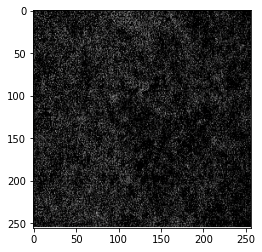

In [ ]:
plt.imshow(im[8],cmap = 'gray')

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


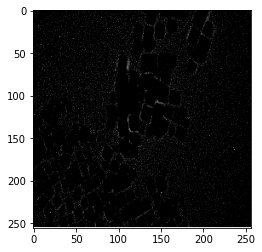

In [ ]:
plt.imshow(y_test[8],cmap = 'gray')

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


ValueError: ignored

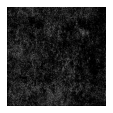

In [ ]:
summarize_test( final_model, dataset, n_samples=1)

In [ ]:
# generate samples and save as a plot and save the model
def summarize_test(g_model, dataset, n_samples=3):
	# select a sample of input images
	[X_realA, X_realB], _ = generate_real_samples(dataset, n_samples, 1)
	# generate a batch of fake samples
	X_fakeB, _ = generate_fake_samples(g_model, X_realA, 1)
	# scale all pixels from [-1,1] to [0,1]
	#X_realA = (X_realA + 1) / 2.0
	#X_realB = (X_realB + 1) / 2.0
	#X_fakeB = (X_fakeB + 1) / 2.0
	# plot real source images
	#for i in range(n_samples):
		#plt.subplot(3, n_samples, 1 + i)
		#plt.axis('off')
		#plt.imshow(X_realA[i])
	# plot generated target image
	for i in range(n_samples):
		plt.subplot(2, n_samples, 1 + n_samples + i)
		plt.axis('off')
		plt.imshow(X_fakeB[i])
	# plot real target image
	for i in range(n_samples):
		plt.subplot(2, n_samples, 1 + n_samples*2 + i)
		plt.axis('off')
		plt.imshow(X_realB[i])
	plt.show()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


0
1
2
3
4


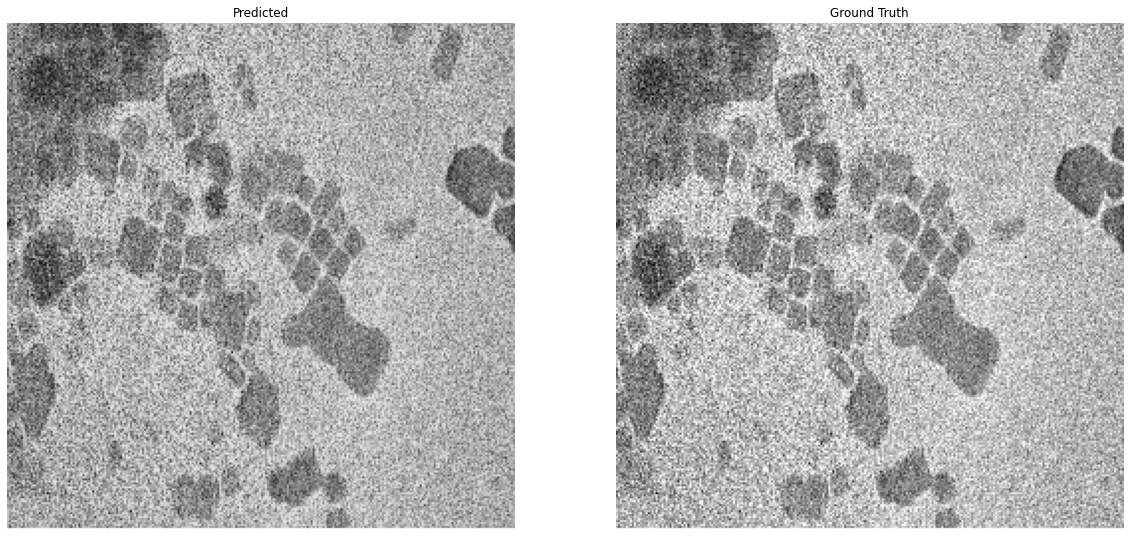

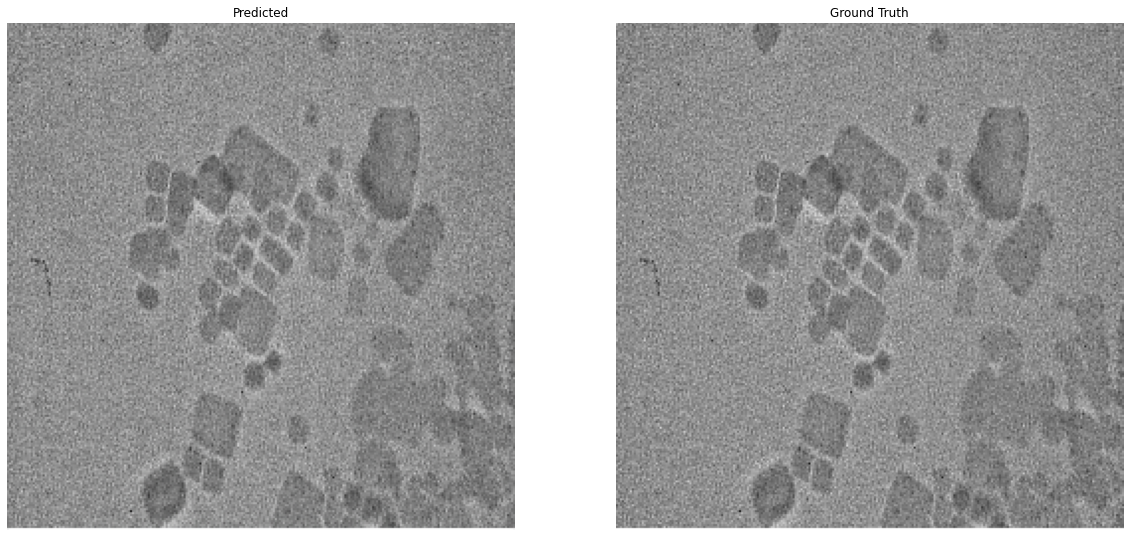

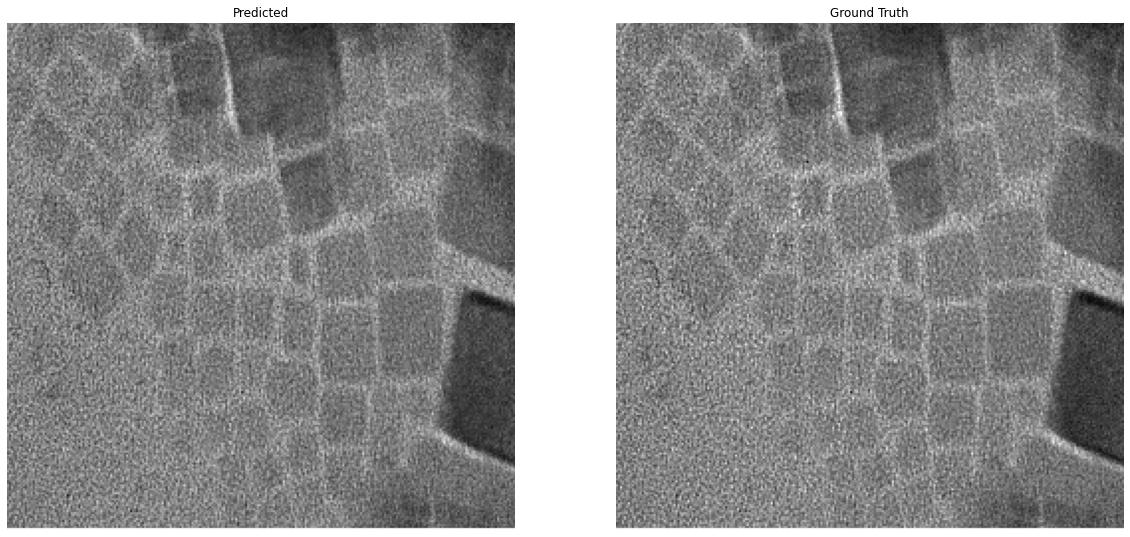

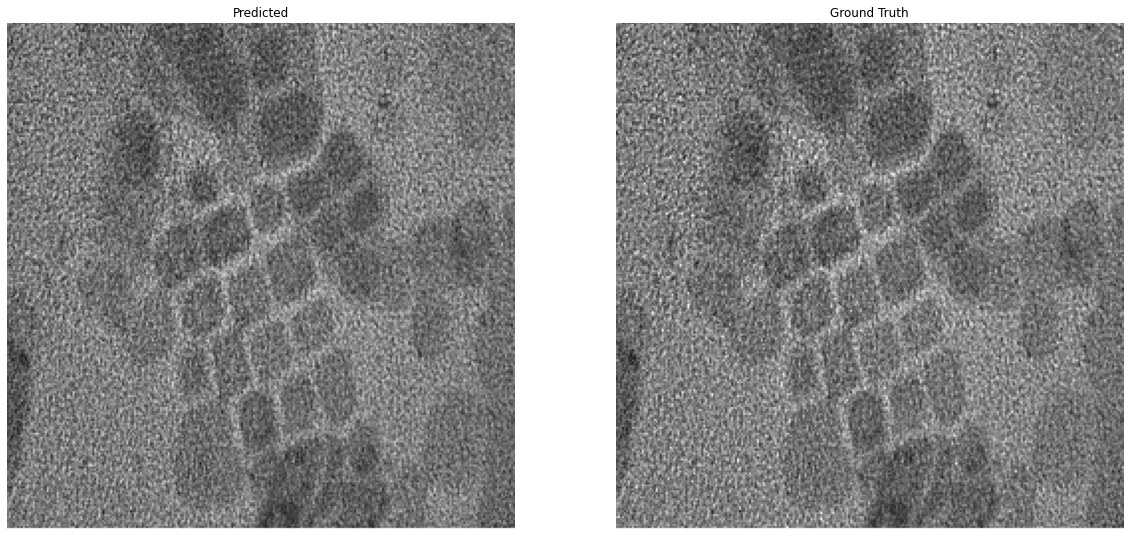

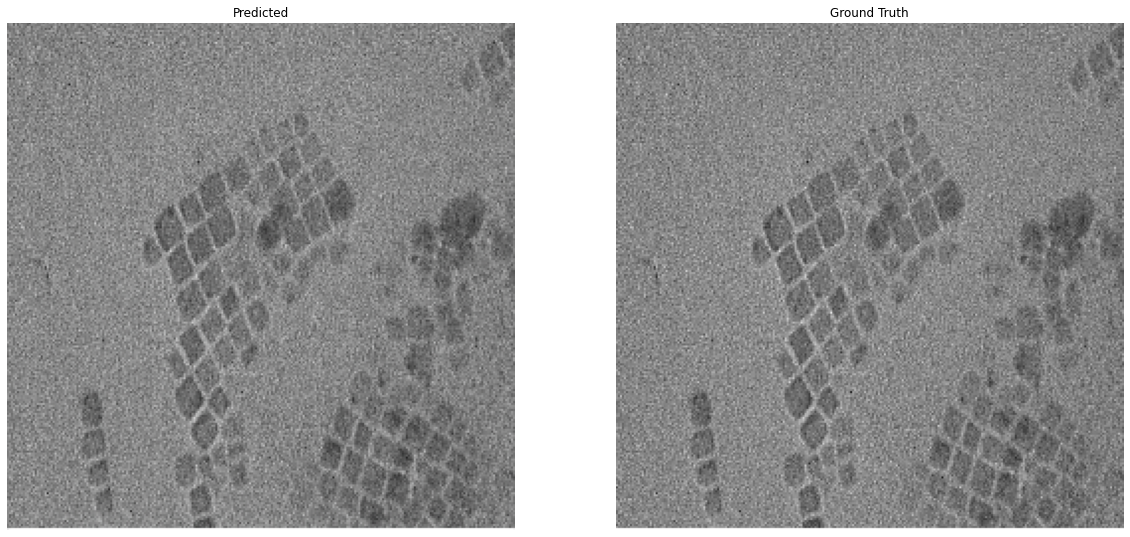

In [ ]:
for i in range((5)):
  X = X_train[i]
  X = X.reshape((1,256,256,3))
  X_fake  = final_model.predict(X)
  X_fake = X_fake.reshape((256,256,3))
  fig = plt.figure(figsize=(20,50))
  fig.add_subplot(1,2,1).set_title('Predicted')
  plt.axis('off')
  #plt.gca().set_title('Predicted')
  plt.imshow(X_fake)
  fig.add_subplot(1,2,2).set_title('Ground Truth')
  plt.axis('off')
  #plt.gca().set_title('Ground Truth')
  plt.imshow(y_train[i])
  print(i)
  filename = base_path+'results/plot_%d.png'%(i)
  plt.savefig(filename)



In [ ]:
p = final_model.predict(X_train)

In [ ]:
np.shape(p[1])

(10, 256, 256, 3)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


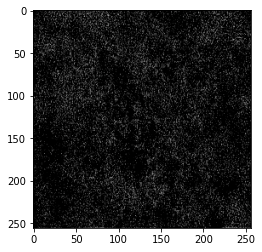

In [ ]:
plt.imshow(p[1][7])

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


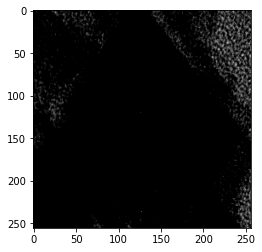

In [ ]:
plt.imshow(X_train[7])

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


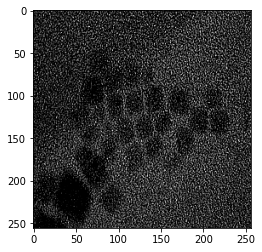

In [ ]:
plt.imshow(y_train[7])

In [ ]:
print(X_li)
print(y_li)

['virCs_001.TIF', 'virCs_002.TIF', 'virCs_003.TIF', 'virCs_004.TIF', 'virCs_005.TIF', 'virCs_006.TIF', 'virCs_007.TIF', 'virCs_008.TIF', 'virCs_009.TIF', 'virCs_010.TIF', 'virCs_011.TIF', 'virCs_012.TIF', 'virCs_013.TIF', 'virCs_014.TIF', 'virCs_015.TIF', 'virCs_016.TIF', 'virCs_017.TIF', 'virCs_018.TIF', 'virCs_019.TIF', 'virCs_020.TIF', 'virCs_021.TIF', 'virCs_022.TIF', 'virCs_023.TIF', 'virCs_024.TIF', 'virCs_025.TIF', 'virCs_026.TIF', 'virCs_027.TIF', 'virCs_028.TIF', 'virCs_029.TIF', 'virCs_030.TIF', 'virCs_031.TIF', 'virCs_032.TIF', 'virCs_033.TIF', 'virCs_034.TIF', 'virCs_035.TIF', 'virCs_036.TIF', 'virCs_037.TIF', 'virCs_038.TIF', 'virCs_039.TIF', 'virCs_040.TIF', 'virCs_041.TIF', 'virCs_042.TIF', 'virCs_043.TIF', 'virCs_044.TIF', 'virCs_045.TIF', 'virCs_046.TIF', 'virCs_047.TIF', 'virCs_048.TIF', 'virCs_049.TIF', 'virCs_050.TIF', 'virCs_051.TIF', 'virCs_052.TIF', 'virCs_053.TIF', 'virCs_054.TIF', 'virCs_055.TIF', 'virCs_056.TIF', 'virCs_057.TIF', 'virCs_058.TIF', 'virCs_059.TI

In [ ]:
a = cv2.imread(X_path+X_li[0])
b = cv2.imread(y_path+y_li[0])
a = a[:-300,:]
b = b[:-300,:]

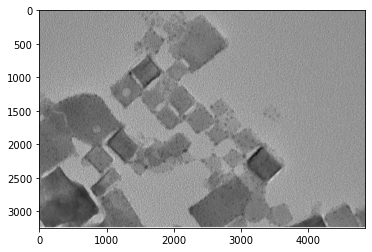

In [ ]:
plt.imshow(a)

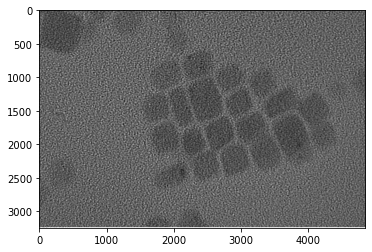

In [ ]:
plt.imshow(b)

In [ ]:
!pip uninstall opencv-python

Uninstalling opencv-python-4.1.2.30:
  Would remove:
    /usr/local/lib/python3.7/dist-packages/cv2/*
    /usr/local/lib/python3.7/dist-packages/opencv_python-4.1.2.30.dist-info/*
Proceed (y/n)? y
  Successfully uninstalled opencv-python-4.1.2.30


In [ ]:
!pip install opencv-python==3.4.2.17
!pip install opencv-contrib-python==3.4.2.17

In [ ]:
sift = cv2.xfeatures2d.SIFT_create()

# find the keypoints and descriptors
standard_kp, standard_des = sift.detectAndCompute(b,None)
target_kp, target_des = sift.detectAndCompute(a,None)

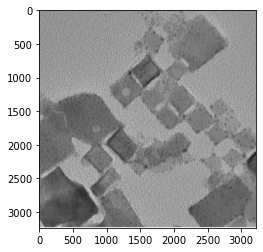

In [ ]:
bf = cv2.BFMatcher(cv2.NORM_L1,crossCheck=False)

matches = bf.match(standard_des,target_des)

x = list()
y= list()
for m in matches:
  (x1, y1) = target_kp[m.trainIdx].pt
  x.append(x1)
  y.append(y1)

x.sort()
y.sort()

x_start = int(x[0])
x_end = int(x[-1])
y_start = int(y[0])
y_end = int(y[-1])

cropped = a[x_start:x_end, y_start:y_end]

plt.imshow(cropped, cmap='gray')
plt.show()

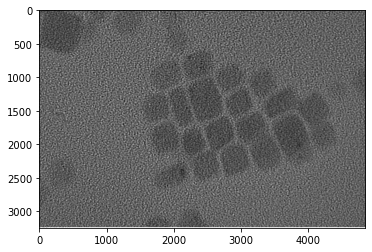

In [ ]:
plt.imshow(b)

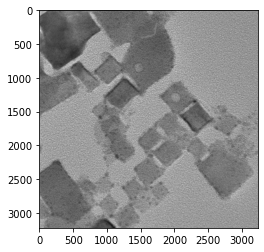

In [ ]:
out1=cv2.transpose(cropped)
out1=cv2.flip(out1,flipCode=1)
plt.imshow(out1)

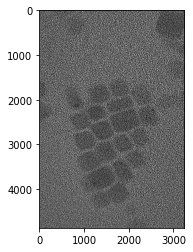

In [ ]:
out2=cv2.transpose(b)
out2=cv2.flip(out2,flipCode=1)
plt.imshow(out2)

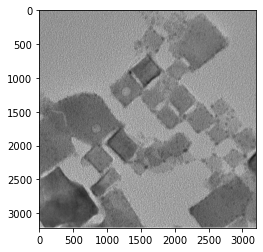

In [ ]:
sift = cv2.xfeatures2d.SIFT_create()

# find the keypoints and descriptors
standard_kp, standard_des = sift.detectAndCompute(out2,None)
target_kp, target_des = sift.detectAndCompute(out1,None)

bf = cv2.BFMatcher(cv2.NORM_L1,crossCheck=False)

matches = bf.match(standard_des,target_des)

x = list()
y= list()
for m in matches:
  (x1, y1) = target_kp[m.trainIdx].pt
  x.append(x1)
  y.append(y1)

x.sort()
y.sort()

x_start = int(x[0])
x_end = int(x[-1])
y_start = int(y[0])
y_end = int(y[-1])

cropped = cropped[x_start:x_end, y_start:y_end]

plt.imshow(cropped, cmap='gray')
plt.show()

Method: %s cv2.TM_CCOEFF
min_val:  74717634560.0
max_val:  74717634560.0
min_loc:  (0, 0)
max_loc:  (0, 0)
 


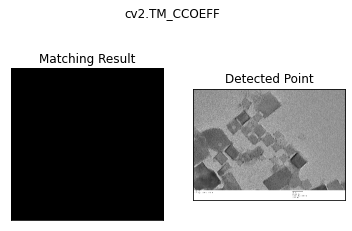

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:2142: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if v not in values:


ValueError: ignored

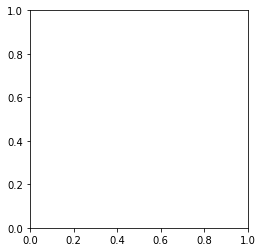

In [ ]:
try:
    img = a
    template = b
except IOError as e:
    print("({})".format(e))
else:
    img2 = img.copy()
    w, h,_ = template.shape[::-1]

methods = ['cv2.TM_CCOEFF', 'cv2.TM_CCOEFF_NORMED', 'cv2.TM_CCORR',
             'cv2.TM_CCORR_NORMED', 'cv2.TM_SQDIFF', 'cv2.TM_SQDIFF_NORMED']


for meth in methods:
    img = img2.copy()
    method = eval(meth)

    # Apply template Matching
    res = cv2.matchTemplate(img,template,method)
    min_val, max_val, min_loc, max_loc = cv2.minMaxLoc(res)
    print("Method: %s" , meth)
    print("min_val: " , min_val)
    print("max_val: " , max_val)
    print("min_loc: " , min_loc)
    print("max_loc: " , max_loc)
    print(" ")
    # If the method is TM_SQDIFF or TM_SQDIFF_NORMED, take minimum
    if method in [cv2.TM_SQDIFF, cv2.TM_SQDIFF_NORMED]:
        top_left = min_loc
    else:
        top_left = max_loc
    bottom_right = (top_left[0] + w, top_left[1] + h)

    cv2.rectangle(img,top_left, bottom_right, 255, 2)

    plt.subplot(121),plt.imshow(res,cmap = 'gray')
    plt.title('Matching Result'), plt.xticks([]), plt.yticks([])
    plt.subplot(122),plt.imshow(img,cmap = 'gray')
    plt.title('Detected Point'), plt.xticks([]), plt.yticks([])
    plt.suptitle(meth) #; plt.legend([min_val, max_val, min_loc, max_loc], ["min_val", "max_val", "min_loc", "max_loc"])

    plt.show()
    box = img[top_left[1]:top_left[1]+h,0:bottom_right[1]+w]
    plt.imshow("cropped", box)